In [ ]:
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import regex as re

## Extracting Multiple House Listing Links from Multiple Pages (32) on Housing.com

In [ ]:
# 1. Build the URL for a given page number
def get_page_url(page_number):
    base = 'https://housing.com/rent/independent-house-villa-from-owners-in-hyderabad-telangana-D2M2P679xe73u28050522?page='
    return base + str(page_number)

# 2. Set headers for the request
def get_headers():
    return {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)'
    }

# 3. Send request and get page content
def get_html_content(url, headers):
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.text
    return None

# 4. Parse HTML and extract house listing links
def get_links_from_html(html):
    soup = BeautifulSoup(html, 'html.parser')
    links = []

    for tag in soup.find_all('a', attrs={'data-q': 'title'}):
        href = tag.get('href')
        if href and href.startswith('/rent/'):
            full_url = 'https://housing.com' + href
            links.append(full_url)
    return links

# 5. Loop through multiple pages and collect all links
def collect_all_links(start_page, end_page):
    headers = get_headers()
    all_links = set()

    for page in range(start_page, end_page + 1):
        url = get_page_url(page)
        html = get_html_content(url, headers)
        if html:
            links = get_links_from_html(html)
            all_links.update(links)

    return list(all_links)

# 6. Main function to extract and return links
def main():
    return collect_all_links(start_page=2, end_page=31)

# 7. Store links globally for reuse
all_house_links = main()


# Example: Print the first 5
for link in all_house_links[:5]:
    print(link)


https://housing.com/rent/17351194-450-sqft-1-bhk-independent-house-on-rent-in-badangpet-hyderabad
https://housing.com/rent/11443921-1200-sqft-2-bhk-independent-house-on-rent-in-kompally-hyderabad
https://housing.com/rent/6283569-900-sqft-2-bhk-independent-house-on-rent-in-suraram-hyderabad
https://housing.com/rent/16961517-600-sqft-1-bhk-independent-house-on-rent-in-patancheru-hyderabad
https://housing.com/rent/16340139-315-sqft-1-rk-independent-house-on-rent-in-jeedimetla-hyderabad


## Extracting Detailed Information (Address, BHK, Bathrooms, Rent, Sqft, Furnishing, Parking, etc.) from Each Listing

In [ ]:
bhk_list = []
rent_list = []
posted_date_list = []
area_list = []
furnishing_list = []
location_list = []
bathrooms_list = []
balcony_list = []
available_from_list = []
parking_list = []

In [ ]:
def safe_extract(soup, tag, class_name):
    element = soup.find(tag, class_=class_name)
    return element.get_text(strip=True) if element else np.nan

In [ ]:
def extract_bhk(soup):
    return safe_extract(soup, 'div', "css-1hidc9c")

def extract_rent(soup):
    return safe_extract(soup, 'div', "css-10rvbm3")

def extract_posted_date(soup):
    for div in soup.find_all('div'):
        if div.text.strip().startswith("Last updated:"):
            return div.text.replace("Last updated:", "").strip()
    return np.nan


def extract_area(soup):
    return safe_extract(soup, 'div', "T_textContainerStyle _cx1y44 _0h1h6o _9s1txw")


def extract_furnishing(soup):
    return safe_extract(soup, 'div', "css-1am49zs")


def extract_location(soup):
    return safe_extract(soup, 'div', "css-1ty5xzi")


In [ ]:
# Table Details: Bathrooms, Balcony, Available From, Parking

def extract_table_fields(soup):
    bathrooms = balcony = available_from = parking = np.nan
    for row in soup.find_all('tr'):
        label = row.find('th')
        value = row.find('td')
        if label and value:
            label_text = label.get_text(strip=True)
            value_div = value.find('div') or value.find('a')
            val = value_div.get_text(strip=True) if value_div else value.get_text(strip=True)

            if label_text == "Bathrooms":
                bathrooms = val
            elif label_text == "Balcony":
                balcony = val
            elif label_text == "Available from":
                available_from = val
            elif label_text == "Parking":
                parking = val
    return bathrooms, balcony, available_from, parking


In [ ]:
def process_url(url):
    try:
        response = requests.get(url, timeout=10)
        soup = BeautifulSoup(response.text, 'html.parser')

        bhk = extract_bhk(soup)
        rent = extract_rent(soup)
        posted_date = extract_posted_date(soup)
        area = extract_area(soup)
        furnishing = extract_furnishing(soup)
        location = extract_location(soup)
        bathrooms, balcony, available_from, parking = extract_table_fields(soup)

        print(f"Scraped: {url}")
        return [bhk, rent, posted_date, area, furnishing, location, bathrooms, balcony, available_from, parking]

    except Exception as e:
        print(f"Failed: {url} | Reason: {e}")
        return [np.nan] * 10
# process_url('https://housing.com/rent/17096983-900-sqft-2-bhk-independent-house-on-rent-in-rhoda-mistri-nagar-hyderabad')

In [ ]:
def scrape_all(url_list):
    for url in url_list:
        bhk, rent, posted_date, area, furnishing, location, bathrooms, balcony, available_from, parking = process_url(url)

        bhk_list.append(bhk)
        rent_list.append(rent)
        posted_date_list.append(posted_date)
        area_list.append(area)
        furnishing_list.append(furnishing)
        location_list.append(location)
        bathrooms_list.append(bathrooms)
        balcony_list.append(balcony)
        available_from_list.append(available_from)
        parking_list.append(parking)

scrape_all(all_house_links)

Scraped: https://housing.com/rent/17351194-450-sqft-1-bhk-independent-house-on-rent-in-badangpet-hyderabad
Scraped: https://housing.com/rent/11443921-1200-sqft-2-bhk-independent-house-on-rent-in-kompally-hyderabad
Scraped: https://housing.com/rent/6283569-900-sqft-2-bhk-independent-house-on-rent-in-suraram-hyderabad
Scraped: https://housing.com/rent/16961517-600-sqft-1-bhk-independent-house-on-rent-in-patancheru-hyderabad
Scraped: https://housing.com/rent/16340139-315-sqft-1-rk-independent-house-on-rent-in-jeedimetla-hyderabad
Scraped: https://housing.com/rent/14920408-500-sqft-2-bhk-independent-house-on-rent-in-darulshifa-hyderabad
Scraped: https://housing.com/rent/8180951-300-sqft-2-bhk-independent-house-on-rent-in-serilingampally-hyderabad-v2
Scraped: https://housing.com/rent/17299971-400-sqft-2-bhk-independent-house-on-rent-in-east-bahadurpura-hyderabad
Scraped: https://housing.com/rent/13925367-2400-sqft-2-bhk-independent-house-on-rent-in-uppal-hyderabad-v2
Scraped: https://housin

## Saving Extracted Data to CSV File

In [ ]:
def save_to_csv(filename="housing_listings.csv"):
    df = pd.DataFrame({
        "BHK": bhk_list,
        "Rent": rent_list,
        "Posted Date": posted_date_list,
        "Area": area_list,
        "Furnishing": furnishing_list,
        "Location": location_list,
        "Bathrooms": bathrooms_list,
        "Balcony": balcony_list,
        "Available From": available_from_list,
        "Parking": parking_list
    })

    df.to_csv(filename, index=False)
    print(f"All data saved to {filename}")

save_to_csv()

All data saved to housing_listings.csv


##  Data Loading & Initial Setup

In [ ]:
df = pd.read_csv('/content/housing_listings.csv')
df.head(5)

,BHK,Rent,Posted Date,Area,Furnishing,Location,Bathrooms,Balcony,Available From,Parking
0,2 BHK Independent Housefor Rent,"12,000","Apr 22, 2025",900 sq.ftconvert unit,Unfurnished900 sq.ftconvert unit,"Jagathgirigutta, Lenin Nagar, Rhoda Mistri Nag...",2,1,Available now,1 Covered and 1 Open Parking
1,2 BHK Independent Housefor Rent,"15,000","May 2, 2025",1100.00 sq.ftconvert unit,Unfurnished1100.00 sq.ftconvert unit,"Subhagruha Sukrithi Delight, Laxmi Nagar Colon...",2,2,Available now,1 Covered and 1 Open Parking
2,2 BHK Independent Housefor Rent,"18,000","Apr 10, 2025",1100 sq.ftconvert unit,Unfurnished1100 sq.ftconvert unit,"New Nagole Colony, Kothapet, Hyderabad",2,-,Available now,No Parking
3,3 BHK Independent Housefor Rent,"15,000","May 18, 2025",1250 sq.ftconvert unit,Unfurnished1250 sq.ftconvert unit,"Shamshiri Bandlaguda, Jahangirabad, Chandrayan...",2,1,Available now,-
4,2 BHK Independent Housefor Rent,"16,000","May 19, 2025",1500 sq.ftconvert unit,Unfurnished1500 sq.ftconvert unit,"Ameenpur, Hyderabad",2,-,"Jun, 2025",-


## Initial Data Inspection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   BHK             807 non-null    object
 1   Rent            807 non-null    object
 2   Posted Date     807 non-null    object
 3   Area            807 non-null    object
 4   Furnishing      807 non-null    object
 5   Location        807 non-null    object
 6   Bathrooms       807 non-null    int64 
 7   Balcony         807 non-null    object
 8   Available From  807 non-null    object
 9   Parking         807 non-null    object
dtypes: int64(1), object(9)
memory usage: 63.2+ KB


In [ ]:
df.describe()

,Bathrooms
count,807.000000
mean,1.867410
std,0.993036
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,10.000000


In [ ]:
df.nunique()

,0
BHK,16
Rent,90
Posted Date,62
Area,169
Furnishing,247
Location,538
Bathrooms,9
Balcony,6
Available From,13
Parking,16




## Data Preprocessing & Cleaning

In [ ]:
def column_wise_analysis(col):
  print(f"Analysis for column: {col}")
  missing_count = df[col].isna().sum()
  print(f"Missing values in {col} are: {missing_count}")
  dtype = df[col].dtype
  print(f"Data type of {col} is: {dtype}")
  unique_values = df[col].nunique()
  print(f"Number of unique values in: {unique_values}")
  print()
for col in df.columns:
  column_wise_analysis(col)


Analysis for column: BHK
Missing values in BHK are: 0
Data type of BHK is: object
Number of unique values in: 16

Analysis for column: Rent
Missing values in Rent are: 0
Data type of Rent is: object
Number of unique values in: 90

Analysis for column: Posted Date
Missing values in Posted Date are: 0
Data type of Posted Date is: object
Number of unique values in: 62

Analysis for column: Area
Missing values in Area are: 0
Data type of Area is: object
Number of unique values in: 169

Analysis for column: Furnishing
Missing values in Furnishing are: 0
Data type of Furnishing is: object
Number of unique values in: 247

Analysis for column: Location
Missing values in Location are: 0
Data type of Location is: object
Number of unique values in: 538

Analysis for column: Bathrooms
Missing values in Bathrooms are: 0
Data type of Bathrooms is: int64
Number of unique values in: 9

Analysis for column: Balcony
Missing values in Balcony are: 0
Data type of Balcony is: object
Number of unique values

#### Extracting BHK number

In [ ]:
text = '7 BHK Independent Housefor Rent'
def extract_bhk_number(text):
  number = re.search(r'\d',text)
  return int(number.group())

extract_bhk_number(text)

7

In [ ]:
df['bhk'] = df['BHK'].apply(lambda x:extract_bhk_number(x))

#### Extracting Area(sqft)

In [ ]:
text = '6200 sq.ftconvert unit'
def extract_sqft_number(text):
  number = re.match(r'\d+',text)
  return int(number.group())

extract_sqft_number(text)

6200

In [ ]:
df['area_sqft'] = df['Area'].apply(lambda x:extract_sqft_number(x))

#### Furnishing status

In [ ]:
text = 'Semi Furnished6200 sq.ftconvert unit'
def furnishing(text):
  x = re.search(r'[A-Za-z]+ [A-Za-z]+',text)
  return x.group()
furnishing(text)

'Semi Furnished'

In [ ]:
df['furnishing_status'] = df['Furnishing'].apply(lambda x:furnishing(x))

#### Handling inconsistent values

In [ ]:
df['furnishing_status'].value_counts()

,count
furnishing_status,
ftconvert unit,364
Semi Furnished,363
Fully Furnished,80


In [ ]:
df['furnishing_status'] = df['furnishing_status'].str.replace('ftconvert unit','Not Mentioned')
df.head(5)

,BHK,Rent,Posted Date,Area,Furnishing,Location,Bathrooms,Balcony,Available From,Parking,bhk,area_sqft,furnishing_status
0,2 BHK Independent Housefor Rent,"12,000","Apr 22, 2025",900 sq.ftconvert unit,Unfurnished900 sq.ftconvert unit,"Jagathgirigutta, Lenin Nagar, Rhoda Mistri Nag...",2,1,Available now,1 Covered and 1 Open Parking,2,900,Not Mentioned
1,2 BHK Independent Housefor Rent,"15,000","May 2, 2025",1100.00 sq.ftconvert unit,Unfurnished1100.00 sq.ftconvert unit,"Subhagruha Sukrithi Delight, Laxmi Nagar Colon...",2,2,Available now,1 Covered and 1 Open Parking,2,1100,Not Mentioned
2,2 BHK Independent Housefor Rent,"18,000","Apr 10, 2025",1100 sq.ftconvert unit,Unfurnished1100 sq.ftconvert unit,"New Nagole Colony, Kothapet, Hyderabad",2,-,Available now,No Parking,2,1100,Not Mentioned
3,3 BHK Independent Housefor Rent,"15,000","May 18, 2025",1250 sq.ftconvert unit,Unfurnished1250 sq.ftconvert unit,"Shamshiri Bandlaguda, Jahangirabad, Chandrayan...",2,1,Available now,-,3,1250,Not Mentioned
4,2 BHK Independent Housefor Rent,"16,000","May 19, 2025",1500 sq.ftconvert unit,Unfurnished1500 sq.ftconvert unit,"Ameenpur, Hyderabad",2,-,"Jun, 2025",-,2,1500,Not Mentioned


#### Extracting Primary_Location and City

In [ ]:
def extract_locality_parts(location):
    parts = str(location).split(',')
    first = parts[0].strip() if parts else np.nan
    last = parts[-1].strip() if len(parts) > 1 else np.nan
    return first, last

# Apply and store in new columns
df[['Primary_Location', 'City']] = df['Location'].apply(
    lambda x: pd.Series(extract_locality_parts(x))
)


#### Cleaning Target Variable (`Rent`)

In [ ]:
def rent_to_numeric(text):
  value = text.replace(',','')
  return int(value)
df['Rent'] = df['Rent'].apply(lambda x:rent_to_numeric(x))

In [ ]:
df.head(3)

,BHK,Rent,Posted Date,Area,Furnishing,Location,Bathrooms,Balcony,Available From,Parking,bhk,area_sqft,furnishing_status,Primary_Location,City
0,2 BHK Independent Housefor Rent,12000,"Apr 22, 2025",900 sq.ftconvert unit,Unfurnished900 sq.ftconvert unit,"Jagathgirigutta, Lenin Nagar, Rhoda Mistri Nag...",2,1,Available now,1 Covered and 1 Open Parking,2,900,Not Mentioned,Jagathgirigutta,Hyderabad
1,2 BHK Independent Housefor Rent,15000,"May 2, 2025",1100.00 sq.ftconvert unit,Unfurnished1100.00 sq.ftconvert unit,"Subhagruha Sukrithi Delight, Laxmi Nagar Colon...",2,2,Available now,1 Covered and 1 Open Parking,2,1100,Not Mentioned,Subhagruha Sukrithi Delight,Hyderabad
2,2 BHK Independent Housefor Rent,18000,"Apr 10, 2025",1100 sq.ftconvert unit,Unfurnished1100 sq.ftconvert unit,"New Nagole Colony, Kothapet, Hyderabad",2,-,Available now,No Parking,2,1100,Not Mentioned,New Nagole Colony,Hyderabad


#### Handling Inconsistent Values in Parking

In [ ]:
df['Parking'].value_counts()

,count
Parking,
-,470
No Parking,134
1 Covered and 1 Open Parking,82
1 Open Parking,41
1 Covered Parking,33
1 Covered and 2 Open Parking,17
2 Covered and 2 Open Parking,8
2 Open Parking,5
1 Covered and 3 Open Parking,4


In [ ]:
df['Parking'] = df['Parking'].str.replace('-','Not Mentioned')
df['Parking'].value_counts()

,count
Parking,
Not Mentioned,470
No Parking,134
1 Covered and 1 Open Parking,82
1 Open Parking,41
1 Covered Parking,33
1 Covered and 2 Open Parking,17
2 Covered and 2 Open Parking,8
2 Open Parking,5
1 Covered and 3 Open Parking,4


#### Handling Inconsistent Values in Balcony

In [ ]:
df['Balcony'].value_counts()

,count
Balcony,
-,546
1,125
No Balcony,61
2,59
3,13
4,3


In [ ]:
df['Balcony'] = df['Balcony'].str.replace('-','Not Mentioned')
df['Balcony'].value_counts()

,count
Balcony,
Not Mentioned,546
1,125
No Balcony,61
2,59
3,13
4,3


#### Feature Engineering

In [ ]:
df['posted_date'] = pd.to_datetime(df['Posted Date'])

In [ ]:
df['posted_date'].value_counts()

,count
posted_date,
2025-04-28,69
2025-05-10,34
2025-05-18,27
2025-05-16,26
2025-05-19,26
...,...
2025-03-30,3
2025-03-27,3
2025-03-21,3


In [ ]:
df['posted_month'] =df['posted_date'].dt.month_name()
df['posted_day'] = df['posted_date'].dt.day_name()
df['weekday/weekend'] = df['posted_date'].dt.weekday.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   BHK                807 non-null    object        
 1   Rent               807 non-null    int64         
 2   Posted Date        807 non-null    object        
 3   Area               807 non-null    object        
 4   Furnishing         807 non-null    object        
 5   Location           807 non-null    object        
 6   Bathrooms          807 non-null    int64         
 7   Balcony            807 non-null    object        
 8   Available From     807 non-null    object        
 9   Parking            807 non-null    object        
 10  bhk                807 non-null    int64         
 11  area_sqft          807 non-null    int64         
 12  furnishing_status  807 non-null    object        
 13  Primary_Location   807 non-null    object        
 14  City      

In [ ]:
df.head(3)

,BHK,Rent,Posted Date,Area,Furnishing,Location,Bathrooms,Balcony,Available From,Parking,bhk,area_sqft,furnishing_status,Primary_Location,City,posted_date,posted_month,posted_day,weekday/weekend
0,2 BHK Independent Housefor Rent,12000,"Apr 22, 2025",900 sq.ftconvert unit,Unfurnished900 sq.ftconvert unit,"Jagathgirigutta, Lenin Nagar, Rhoda Mistri Nag...",2,1,Available now,1 Covered and 1 Open Parking,2,900,Not Mentioned,Jagathgirigutta,Hyderabad,2025-04-22,April,Tuesday,Weekday
1,2 BHK Independent Housefor Rent,15000,"May 2, 2025",1100.00 sq.ftconvert unit,Unfurnished1100.00 sq.ftconvert unit,"Subhagruha Sukrithi Delight, Laxmi Nagar Colon...",2,2,Available now,1 Covered and 1 Open Parking,2,1100,Not Mentioned,Subhagruha Sukrithi Delight,Hyderabad,2025-05-02,May,Friday,Weekday
2,2 BHK Independent Housefor Rent,18000,"Apr 10, 2025",1100 sq.ftconvert unit,Unfurnished1100 sq.ftconvert unit,"New Nagole Colony, Kothapet, Hyderabad",2,Not Mentioned,Available now,No Parking,2,1100,Not Mentioned,New Nagole Colony,Hyderabad,2025-04-10,April,Thursday,Weekday


#### Re-checking Missing Values and Duplicates

In [ ]:
df.isna().sum()

,0
BHK,0
Rent,0
Posted Date,0
Area,0
Furnishing,0
Location,0
Bathrooms,0
Balcony,0
Available From,0
Parking,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df[df.duplicated()]

,BHK,Rent,Posted Date,Area,Furnishing,Location,Bathrooms,Balcony,Available From,Parking,bhk,area_sqft,furnishing_status,Primary_Location,City,posted_date,posted_month,posted_day,weekday/weekend


In [ ]:
df = df.drop_duplicates()
df.head(3)

,BHK,Rent,Posted Date,Area,Furnishing,Location,Bathrooms,Balcony,Available From,Parking,bhk,area_sqft,furnishing_status,Primary_Location,City,posted_date,posted_month,posted_day,weekday/weekend
0,2 BHK Independent Housefor Rent,12000,"Apr 22, 2025",900 sq.ftconvert unit,Unfurnished900 sq.ftconvert unit,"Jagathgirigutta, Lenin Nagar, Rhoda Mistri Nag...",2,1,Available now,1 Covered and 1 Open Parking,2,900,Not Mentioned,Jagathgirigutta,Hyderabad,2025-04-22,April,Tuesday,Weekday
1,2 BHK Independent Housefor Rent,15000,"May 2, 2025",1100.00 sq.ftconvert unit,Unfurnished1100.00 sq.ftconvert unit,"Subhagruha Sukrithi Delight, Laxmi Nagar Colon...",2,2,Available now,1 Covered and 1 Open Parking,2,1100,Not Mentioned,Subhagruha Sukrithi Delight,Hyderabad,2025-05-02,May,Friday,Weekday
2,2 BHK Independent Housefor Rent,18000,"Apr 10, 2025",1100 sq.ftconvert unit,Unfurnished1100 sq.ftconvert unit,"New Nagole Colony, Kothapet, Hyderabad",2,Not Mentioned,Available now,No Parking,2,1100,Not Mentioned,New Nagole Colony,Hyderabad,2025-04-10,April,Thursday,Weekday


#### Dropping Columns

In [ ]:
df = df.drop(['BHK','Posted Date','Area','Furnishing','Location'],axis=1)

In [ ]:
df.rename(columns={"Rent": "rent", "Bathrooms": "bathrooms",'Balcony':'balcony','Available From':'rent_available_from',
                   'Parking':'parking','Primary_Location':'primary_location','City':'city'},inplace=True)

In [ ]:
df.head(3)

,rent,bathrooms,balcony,rent_available_from,parking,bhk,area_sqft,furnishing_status,primary_location,city,posted_date,posted_month,posted_day,weekday/weekend
0,12000,2,1,Available now,1 Covered and 1 Open Parking,2,900,Not Mentioned,Jagathgirigutta,Hyderabad,2025-04-22,April,Tuesday,Weekday
1,15000,2,2,Available now,1 Covered and 1 Open Parking,2,1100,Not Mentioned,Subhagruha Sukrithi Delight,Hyderabad,2025-05-02,May,Friday,Weekday
2,18000,2,Not Mentioned,Available now,No Parking,2,1100,Not Mentioned,New Nagole Colony,Hyderabad,2025-04-10,April,Thursday,Weekday


In [ ]:
df.columns

Index(['rent', 'bathrooms', 'balcony', 'rent_available_from', 'parking', 'bhk',
       'area_sqft', 'furnishing_status', 'primary_location', 'city',
       'posted_date', 'posted_month', 'posted_day', 'weekday/weekend'],
      dtype='object')

In [ ]:
new_order = ['bhk','bathrooms','balcony','area_sqft','furnishing_status','parking','primary_location','city','rent_available_from',
             'posted_date','posted_month','posted_day','weekday/weekend','rent']


In [ ]:
df = df[new_order]
df.head(3)

,bhk,bathrooms,balcony,area_sqft,furnishing_status,parking,primary_location,city,rent_available_from,posted_date,posted_month,posted_day,weekday/weekend,rent
0,2,2,1,900,Not Mentioned,1 Covered and 1 Open Parking,Jagathgirigutta,Hyderabad,Available now,2025-04-22,April,Tuesday,Weekday,12000
1,2,2,2,1100,Not Mentioned,1 Covered and 1 Open Parking,Subhagruha Sukrithi Delight,Hyderabad,Available now,2025-05-02,May,Friday,Weekday,15000
2,2,2,Not Mentioned,1100,Not Mentioned,No Parking,New Nagole Colony,Hyderabad,Available now,2025-04-10,April,Thursday,Weekday,18000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   bhk                  807 non-null    int64         
 1   bathrooms            807 non-null    int64         
 2   balcony              807 non-null    object        
 3   area_sqft            807 non-null    int64         
 4   furnishing_status    807 non-null    object        
 5   parking              807 non-null    object        
 6   primary_location     807 non-null    object        
 7   city                 807 non-null    object        
 8   rent_available_from  807 non-null    object        
 9   posted_date          807 non-null    datetime64[ns]
 10  posted_month         807 non-null    object        
 11  posted_day           807 non-null    object        
 12  weekday/weekend      807 non-null    object        
 13  rent                 807 non-null  

In [ ]:
numerical_features = df.select_dtypes(include=['int']).columns.tolist()
print(numerical_features)
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_features)
date_features = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()
print(date_features)

['bhk', 'bathrooms', 'area_sqft', 'rent']
['balcony', 'furnishing_status', 'parking', 'primary_location', 'city', 'rent_available_from', 'posted_month', 'posted_day', 'weekday/weekend']
['posted_date']


### Outlier Detection and Treatment

In [ ]:
outlier_indices_by_feature = {}

for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_indices = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index.tolist()

    outlier_indices_by_feature[feature] = outlier_indices

for feature, indices in outlier_indices_by_feature.items():
    print(f"Outlier Indices for {feature}: {indices}")

Outlier Indices for bhk: [0, 30, 47, 48, 158, 238, 245, 248, 259, 277, 282, 311, 315, 369, 378, 391, 393, 427, 484, 501, 537, 563, 573, 587, 604, 667, 686, 690, 714]
Outlier Indices for bathrooms: [0, 30, 34, 47, 48, 51, 158, 162, 238, 245, 248, 259, 264, 277, 282, 315, 369, 378, 391, 393, 427, 484, 501, 537, 573, 587, 604, 618, 667, 686, 690, 714, 751]
Outlier Indices for area_sqft: [0, 30, 31, 34, 47, 51, 155, 158, 162, 259, 264, 277, 282, 287, 347, 378, 393, 401, 407, 457, 501, 537, 573, 587, 592, 615, 667, 686, 690, 712]
Outlier Indices for rent: [0, 17, 30, 31, 34, 47, 48, 51, 60, 80, 99, 101, 132, 145, 151, 158, 162, 186, 207, 238, 259, 261, 264, 266, 277, 282, 291, 298, 316, 329, 332, 369, 370, 372, 376, 378, 393, 401, 413, 457, 472, 484, 485, 501, 537, 544, 554, 563, 573, 587, 592, 615, 634, 642, 660, 669, 684, 686, 690, 712, 733, 750, 751, 778, 798]


### Inspecting few outlier or extreme value records

In [ ]:
df.iloc[[0,35,31,34,47]]

,bhk,bathrooms,balcony,area_sqft,furnishing_status,parking,primary_location,city,rent_available_from,posted_date,posted_month,posted_day,weekday/weekend,rent
0,7,7,Not Mentioned,6200,Semi Furnished,Not Mentioned,Adda Gutta,Secunderabad,Available now,2025-03-24,March,Monday,Weekday,100000
40,2,2,Not Mentioned,1100,Semi Furnished,Not Mentioned,Velly View Enclave,Sikanderguda,Available now,2025-04-20,April,Sunday,Weekend,15000
36,2,2,Not Mentioned,1250,Semi Furnished,Not Mentioned,3 floor building,Hyderabad,Available now,2025-03-31,March,Monday,Weekday,18000
39,1,1,2,600,Not Mentioned,2 Open Parking,Habib Fatima Nagar,New Allapur,Available now,2025-05-17,May,Saturday,Weekend,8500
52,1,1,Not Mentioned,1050,Not Mentioned,Not Mentioned,IDA Uppal,Hyderabad,Available now,2025-03-28,March,Friday,Weekday,8500


In [ ]:
df[(df['bhk'] == 1) & (df['bathrooms'] == 10)]

,bhk,bathrooms,balcony,area_sqft,furnishing_status,parking,primary_location,city,rent_available_from,posted_date,posted_month,posted_day,weekday/weekend,rent
162,1,10,Not Mentioned,7500,Semi Furnished,Not Mentioned,Our colony shaiket,Hyderabad,Available now,2025-04-12,April,Saturday,Weekend,150000


In [ ]:
df[df['rent'].isin([425000, 350000, 500000])]


,bhk,bathrooms,balcony,area_sqft,furnishing_status,parking,primary_location,city,rent_available_from,posted_date,posted_month,posted_day,weekday/weekend,rent
207,2,3,Not Mentioned,850,Semi Furnished,Not Mentioned,Krishna Nagar,Hyderabad,Available now,2025-05-15,May,Thursday,Weekday,350000
259,4,4,Not Mentioned,6000,Semi Furnished,No Parking,Hanumanpet,Secunderabad,Available now,2025-03-30,March,Sunday,Weekend,500000
750,1,1,Not Mentioned,1250,Semi Furnished,Not Mentioned,Madhura Nagar Colony,Hyderabad,"Aug, 2025",2025-05-10,May,Saturday,Weekend,425000


- I inspected high rent listings such as 4,25,000, 3,50,000, and 5,00,000, and also cases like 1 BHK with 10 bathrooms.
- After verifying with area (sqft), BHK, and locality connectivity, I found these are not outliers or data entry errors.
- These entries have justifiable values with strong contextual reasons (e.g., large area or premium locality). Hence, I retained all such records as they provide valid and meaningful insights.

##  4. **Exploratory Data Analysis (EDA)**

#### Descriptive statistics

In [ ]:
df[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
bhk,799.0,1.833542,0.972595,1.0,1.0,2.0,2.0,9.0
bathrooms,799.0,1.867334,0.994935,1.0,1.0,2.0,2.0,10.0
area_sqft,799.0,1053.032541,850.208094,50.0,500.0,999.0,1300.0,8000.0
rent,799.0,17856.448060,31274.399976,1500.0,8000.0,12000.0,18000.0,500000.0


#### Key Interpretation
- Most listings are 2 BHK, 2 bathroom houses, typically 500–1300 sqft in area.

- The majority of rents fall between ₹8,000 and ₹18,000, though some premium listings exist.
- Some listings feature up to 9–10 BHKs and bathrooms, With areas up to 8000 sqft

- Rents reaching 5 Lakhs per month.

In [ ]:
df[categorical_features].describe(include='O').T

,count,unique,top,freq
balcony,799,6,Not Mentioned,547
furnishing_status,799,3,Semi Furnished,359
parking,799,16,Not Mentioned,471
primary_location,799,505,Ameenpur,14
city,799,8,Hyderabad,614
rent_available_from,799,13,Available now,693
posted_month,799,3,May,387
posted_day,799,7,Monday,174
weekday/weekend,799,2,Weekday,556


- Most listings did not mention balcony details (547 out of 799).

- Parking information is missing in many listings (471 out of 799).

- Majority of houses are semi-furnished (359 listings).

- Most listings are from Hyderabad city (614 out of 799).

- Ameenpur is the most frequently listed locality.

- Most houses are available for immediate occupancy (693 marked as "Available now").

- Listings are mostly posted on Mondays (174 listings).

- Majority of postings are done during weekdays (556 out of 799).

In [ ]:
df['posted_date'].describe()

,posted_date
count,799
mean,2025-04-28 05:46:01.952440832
min,2025-03-04 00:00:00
25%,2025-04-20 00:00:00
50%,2025-04-30 00:00:00
75%,2025-05-11 00:00:00
max,2025-05-20 00:00:00


- Earliest listing was posted on March 4, 2025.

- Most listings were posted between April 20 and May 11, 2025.


- Latest listing was posted on May 20, 2025.

- This suggests that majority of listings are recent and active within the last 1–3 months.

### Univariate Analysis

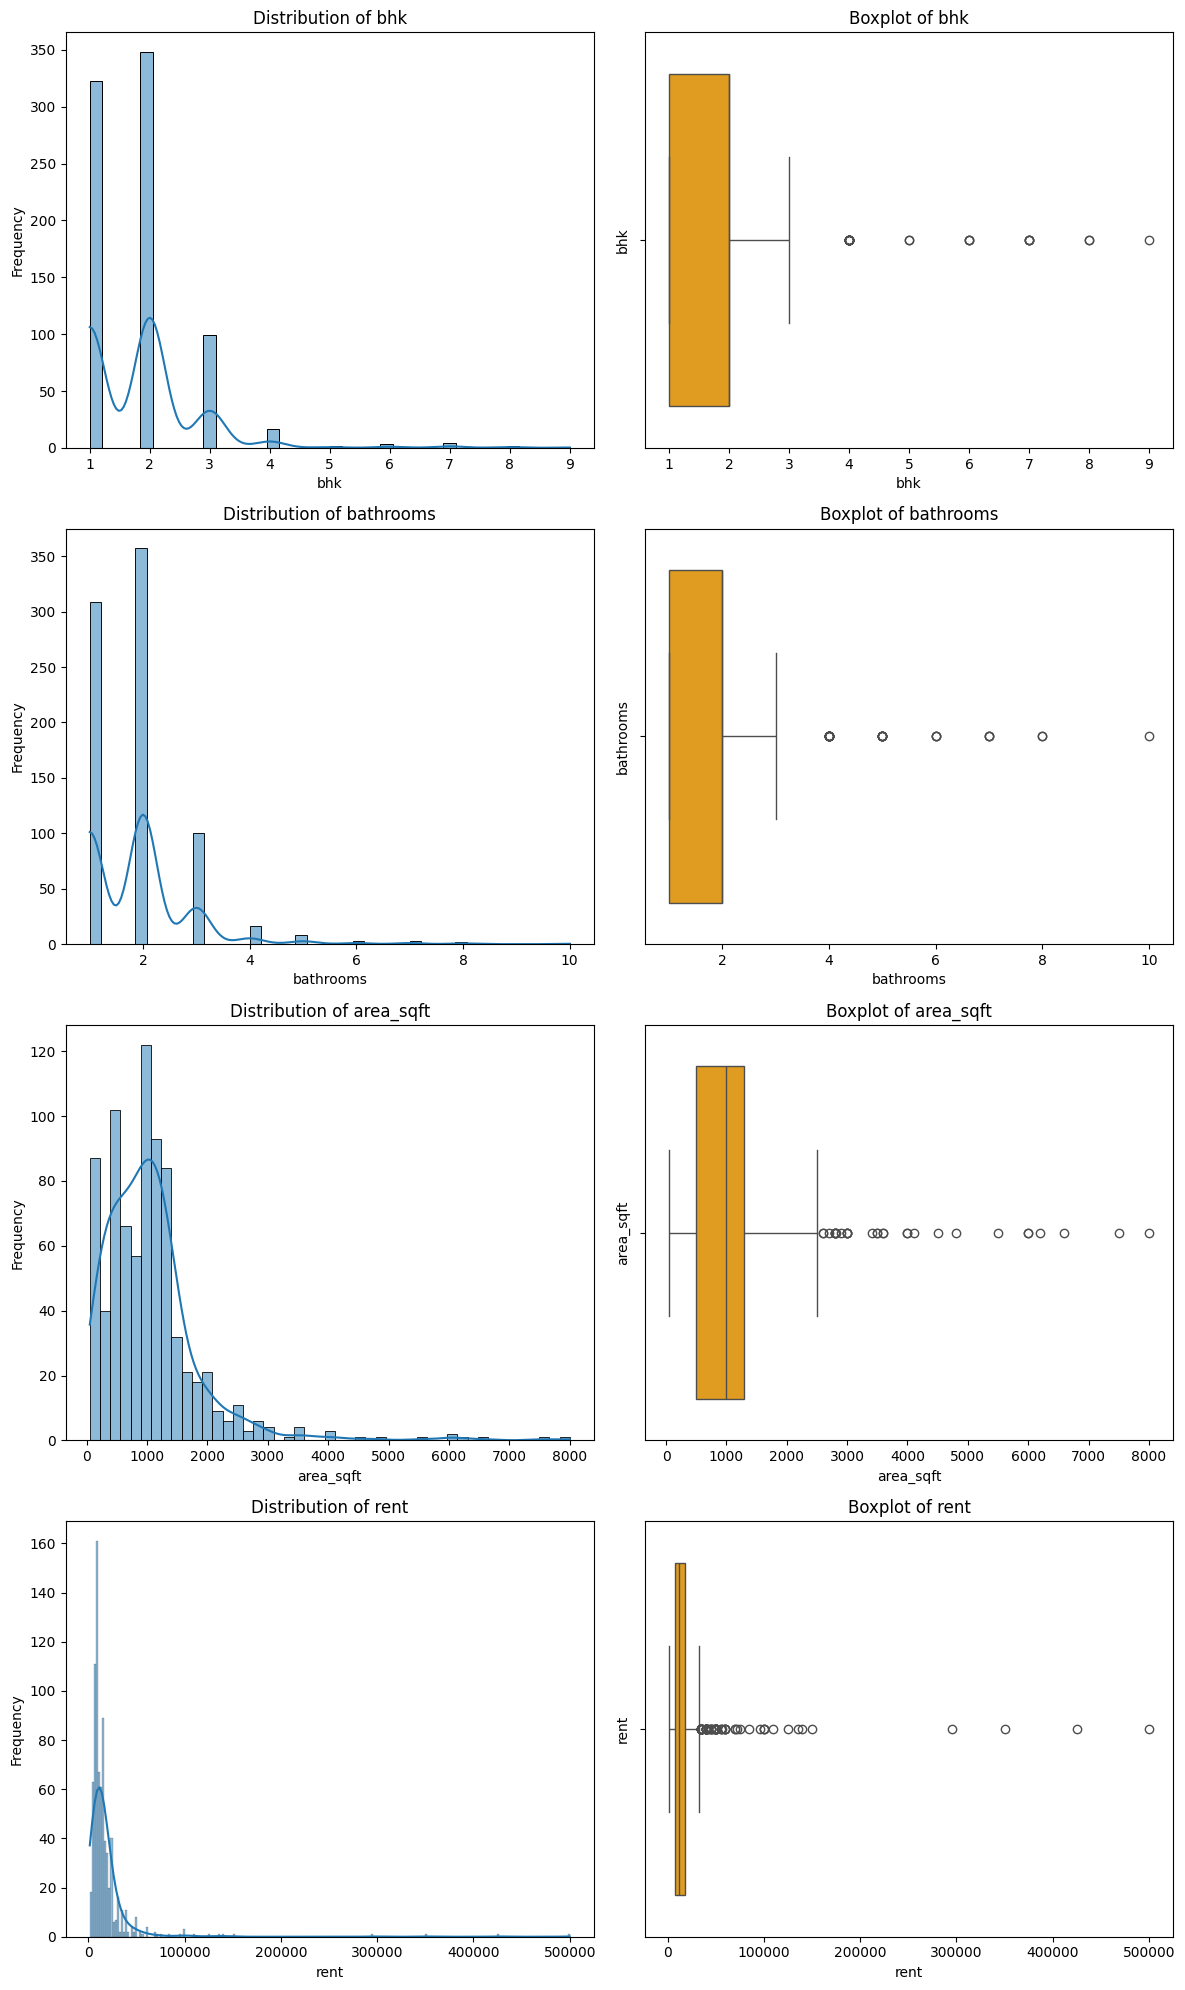

In [ ]:
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(12, 5 * len(numerical_features)))

for i, col in enumerate(numerical_features):

    sns.histplot(data=df, x=col, ax=axes[i, 0],kde=True)
    axes[i, 0].set_title(f'Distribution of {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')

    sns.boxplot(data=df, x=col, ax=axes[i, 1],color='orange')
    axes[i, 1].set_title(f'Boxplot of {col}')
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel(col)

plt.tight_layout()
plt.show()

- More than 95% of listed houses have between 1 to 4 BHKs.

- Around 82% of houses are either 1 or 2 BHKs, showing a strong preference for compact homes.

- A few premium listings offer up to 9 BHKs, indicating luxurious properties.

- Over 95% of the houses have 1 to 4 bathrooms.

- Similar to BHKs, about 82% of homes have 1 or 2 bathrooms.

- Some exclusive listings include up to 10 bathrooms.

- Most house areas are concentrated between 500 to 3000 sqft.

- A few exceptional listings go up to 8000 sqft, typically luxury rentals.

In [ ]:
# Removing primary location feature because it contains more than 100 unique values so it is hard to visualize
categorical_features.remove('primary_location')

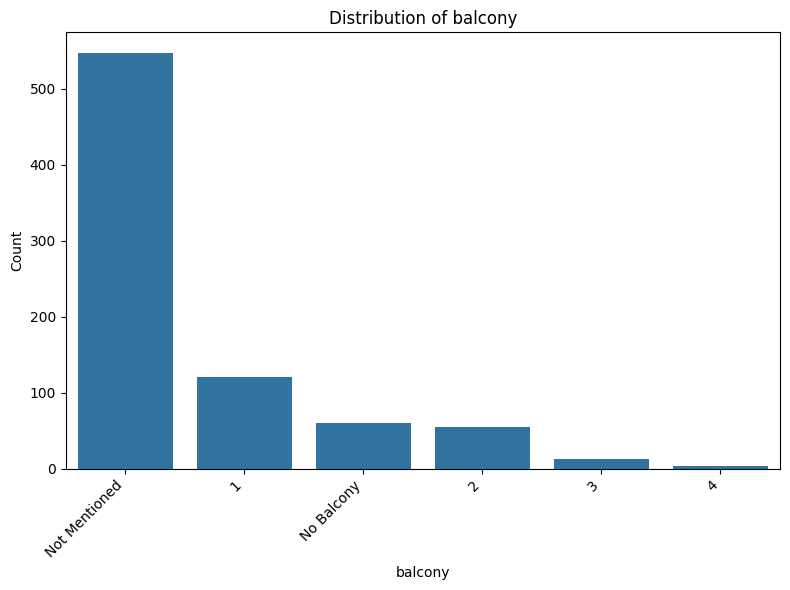

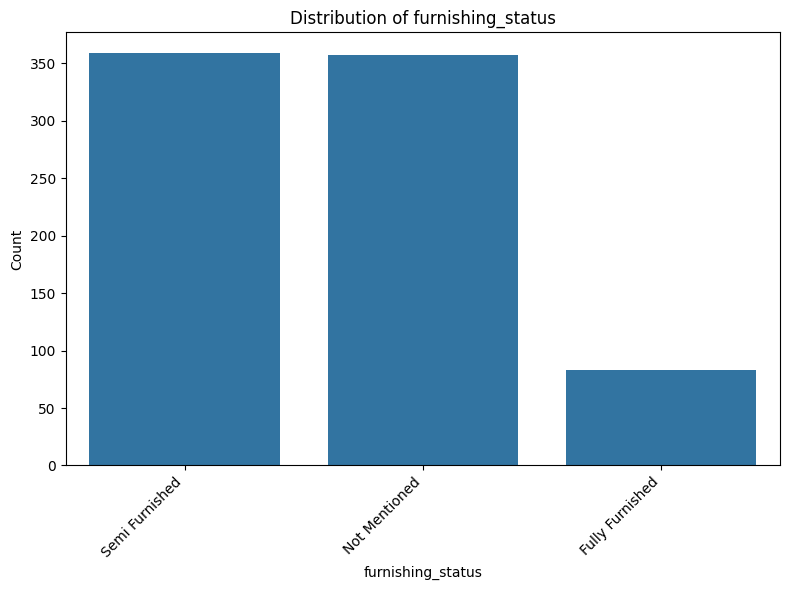

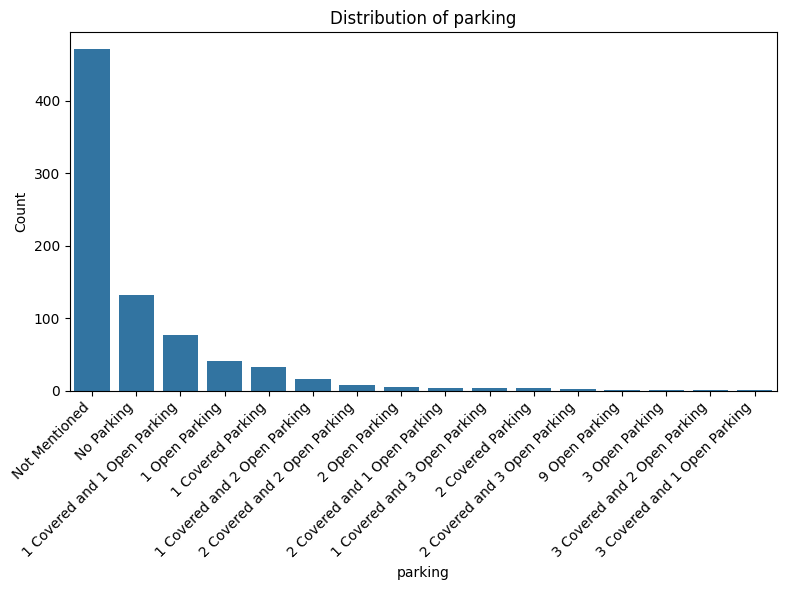

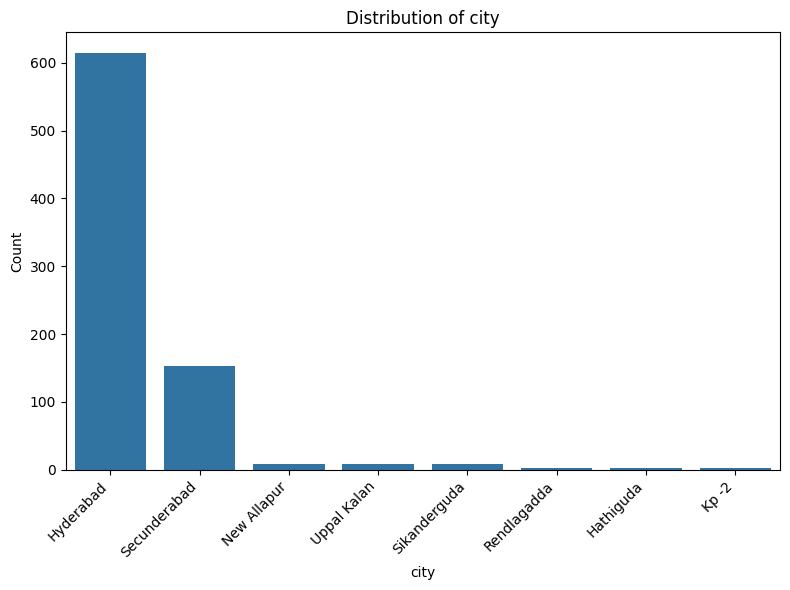

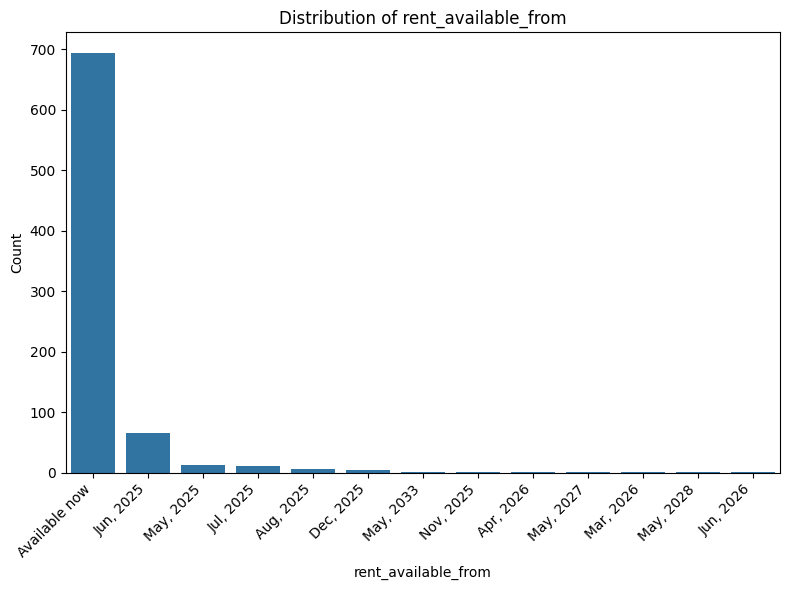

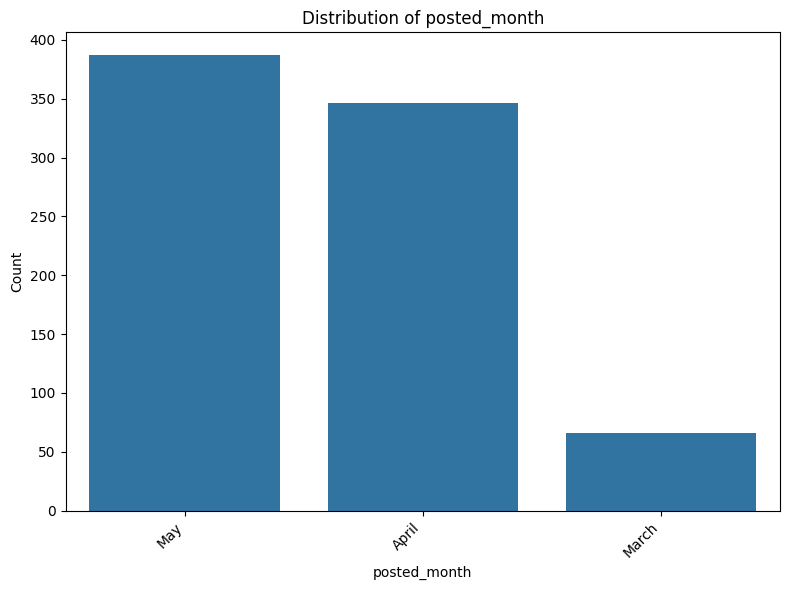

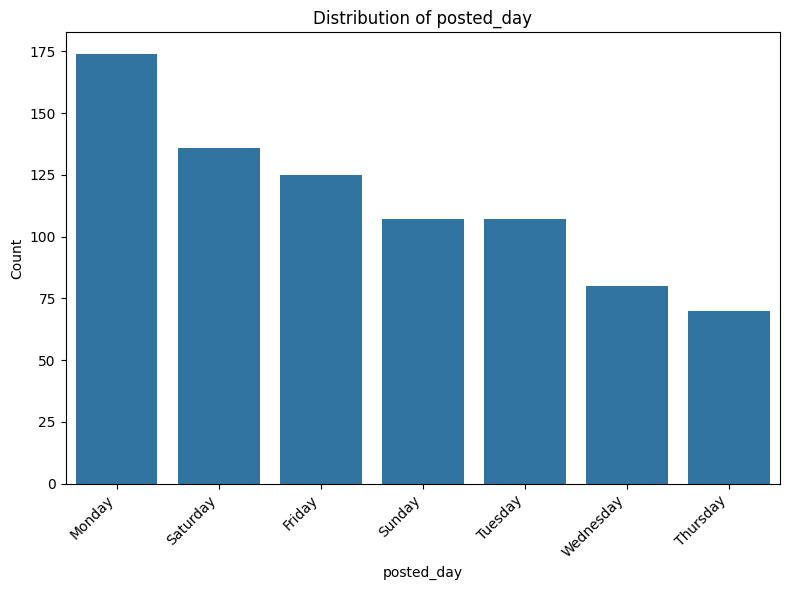

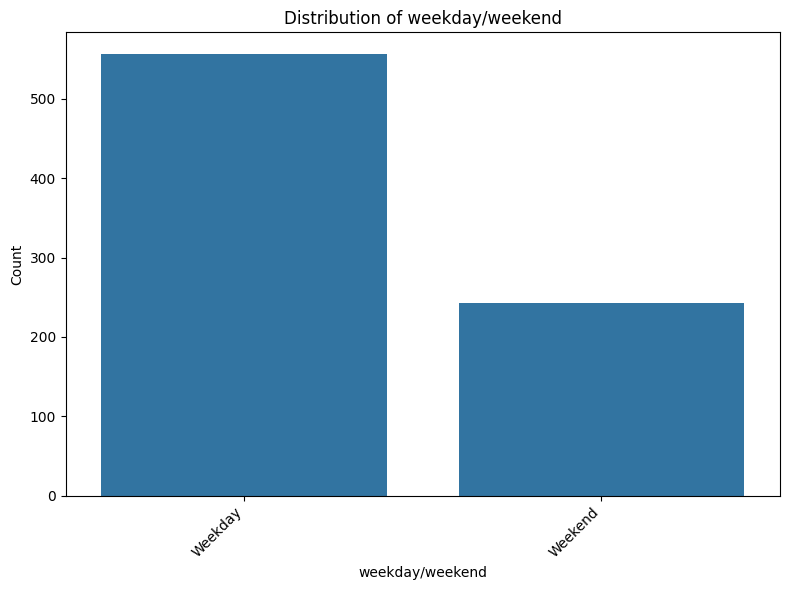

In [ ]:
for col in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

- Most of the listed houses have not mentioned balcony information, contributing to nearly 75% of the listings.

- Among the remaining, houses typically have 1 or 2 balconies.

- Regarding furnishing status, about 45% of houses are semi-furnished.

- Around 42% of listings have not mentioned their furnishing status, while a smaller share is fully furnished.

- For the parking feature, most listings have not mentioned any details.

- A significant portion has no parking, while a few offer 1 open or covered parking space.

- City-wise, most listings are from Hyderabad and Secunderabad.

- A smaller number of houses are listed from New Allampur, Hathiguda, and KP-2 areas.

## Bivariate Analysis

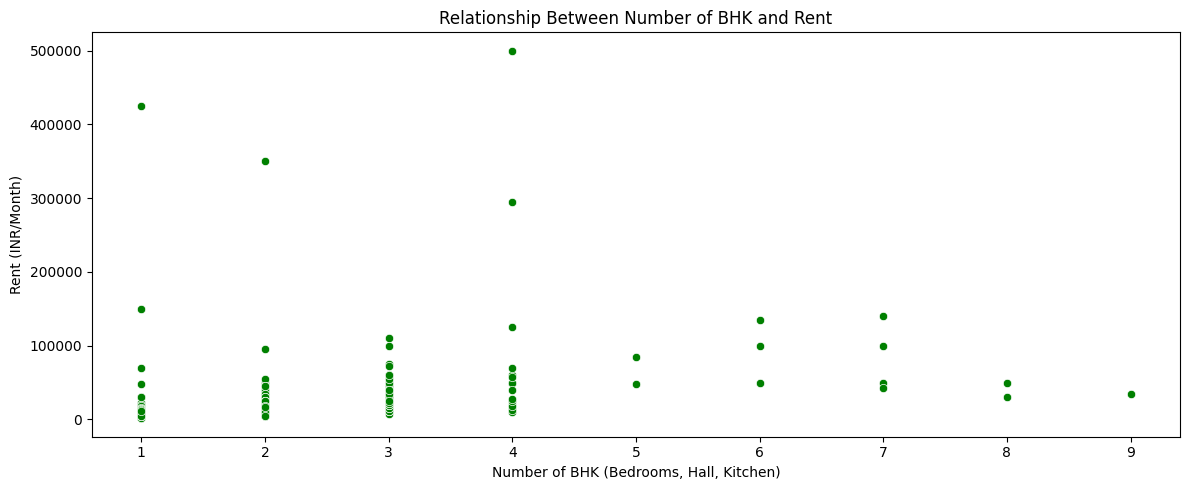

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df,x='bhk',y='rent',markers='o',color='green')
plt.title('Relationship Between Number of BHK and Rent')
plt.xlabel('Number of BHK (Bedrooms, Hall, Kitchen)')
plt.ylabel('Rent (INR/Month)')
plt.tight_layout()
plt.show()

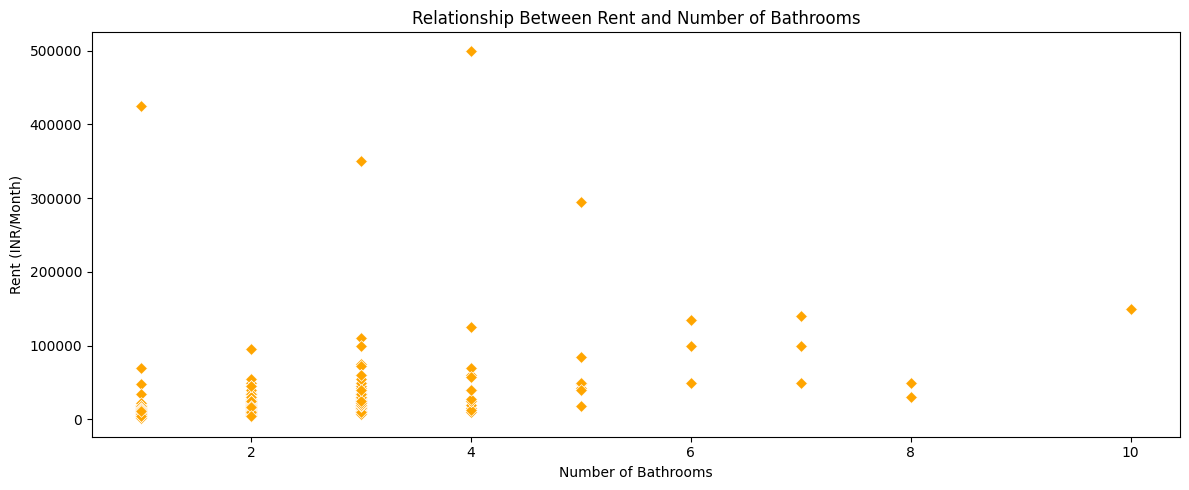

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df,x='bathrooms',y='rent',marker='D',color='orange')
plt.title('Relationship Between Rent and Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Rent (INR/Month)')
plt.tight_layout()
plt.show()

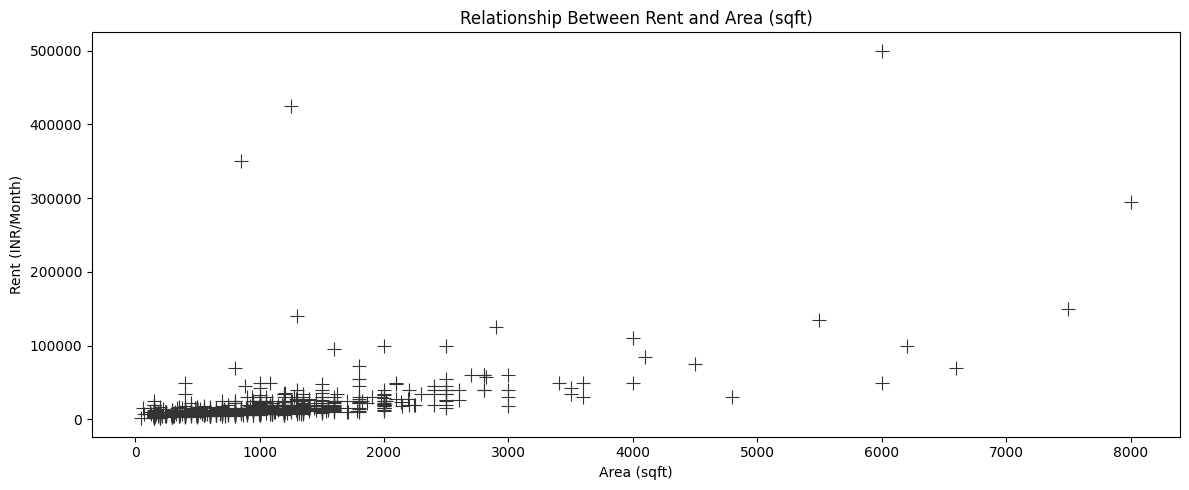

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df,x='area_sqft',y='rent',s=100, color=".2", marker="+")
plt.title('Relationship Between Rent and Area (sqft)')
plt.xlabel('Area (sqft)')
plt.ylabel('Rent (INR/Month)')
plt.tight_layout()
plt.show()

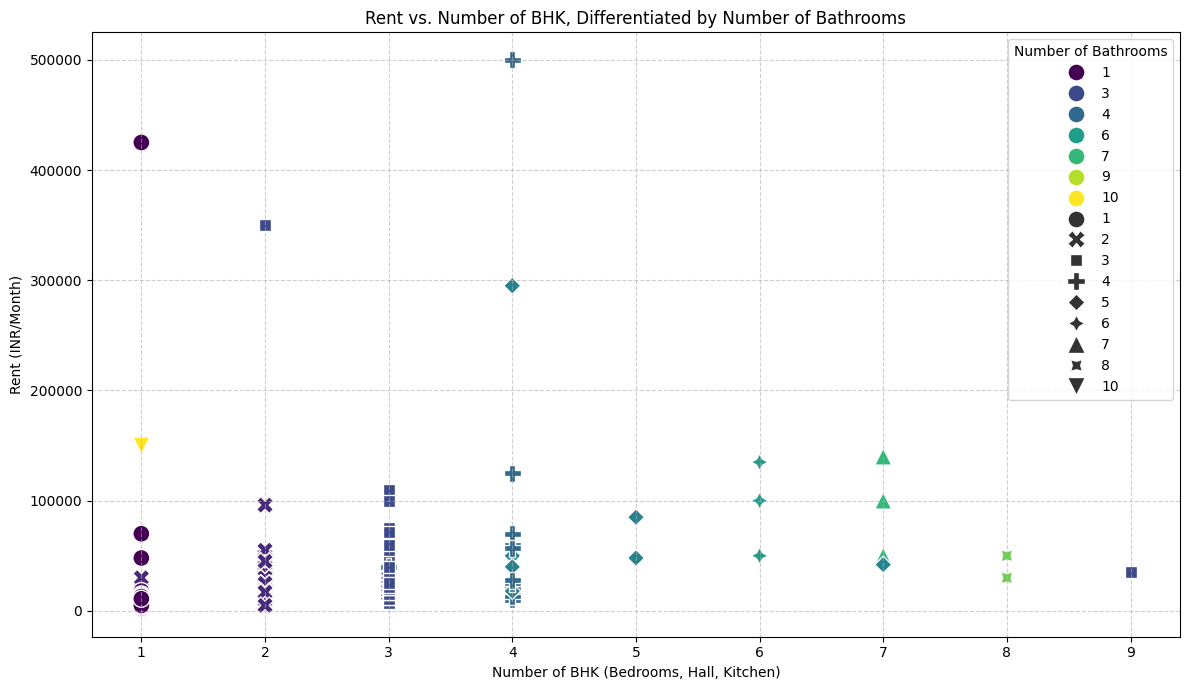

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=df,x='bhk',y='rent',style='bathrooms',s=150, hue='bathrooms',palette='viridis')
plt.title('Rent vs. Number of BHK, Differentiated by Number of Bathrooms')
plt.legend(title='Number of Bathrooms', fontsize=10, loc='best')
plt.xlabel('Number of BHK (Bedrooms, Hall, Kitchen)')
plt.ylabel('Rent (INR/Month)')
plt.legend(title='Number of Bathrooms')
plt.xticks()
plt.yticks()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

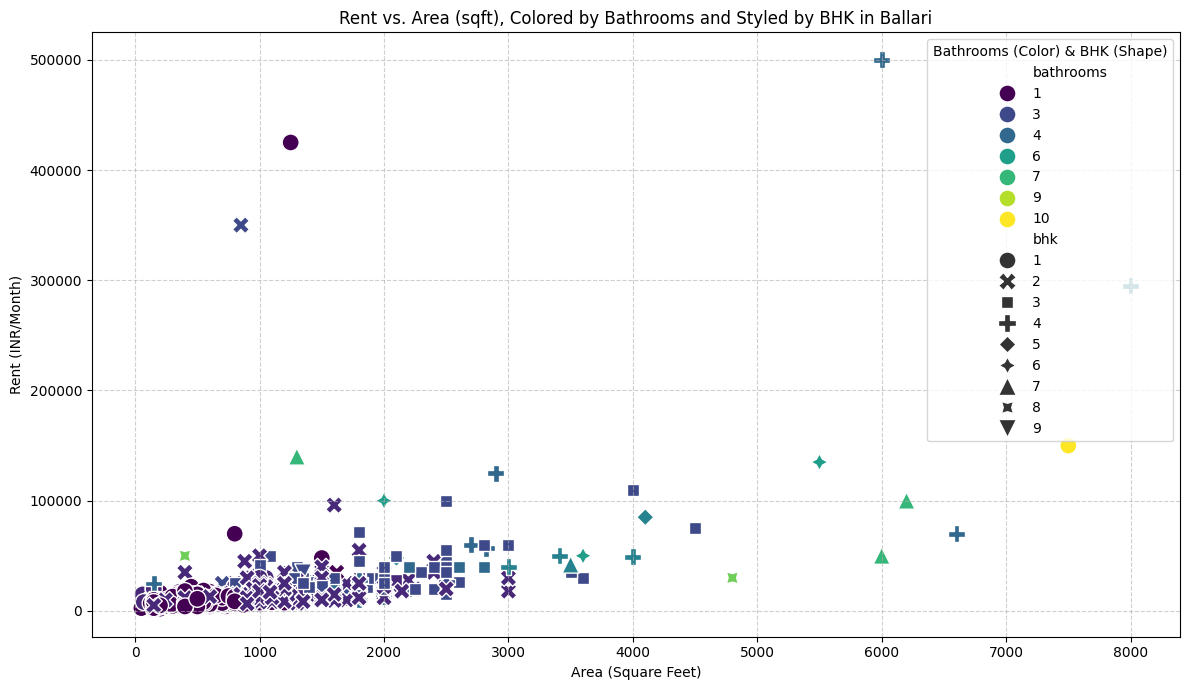

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='area_sqft', y='rent', hue='bathrooms', style='bhk', s=150, palette='viridis')
plt.title('Rent vs. Area (sqft), Colored by Bathrooms and Styled by BHK in Ballari')
plt.xlabel('Area (Square Feet)')
plt.ylabel('Rent (INR/Month)')
plt.legend(title='Bathrooms (Color) & BHK (Shape)', loc='upper right')
plt.xticks()
plt.yticks()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Avg rent by bhk and bathroom

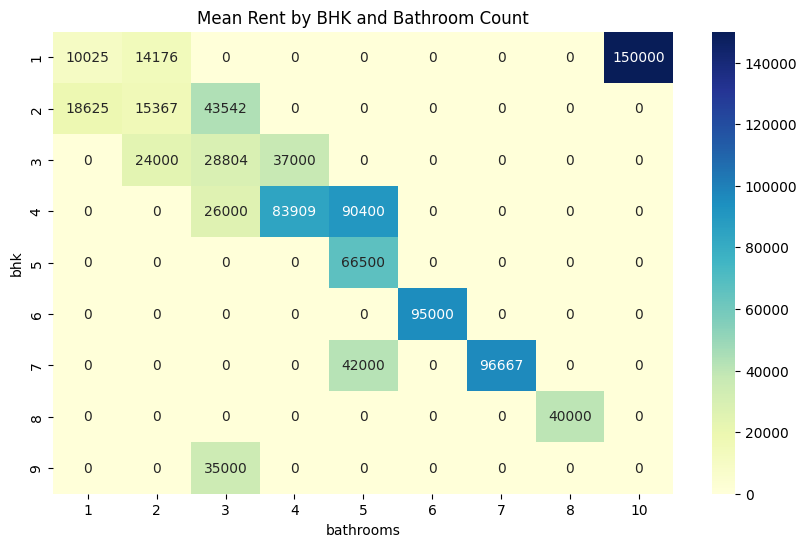

In [ ]:
pivot_mean = df.pivot_table(index='bhk', columns='bathrooms', values='rent', aggfunc='mean',fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_mean, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("Mean Rent by BHK and Bathroom Count")
plt.show()

#### Minimum rent by bhk and bathrooms

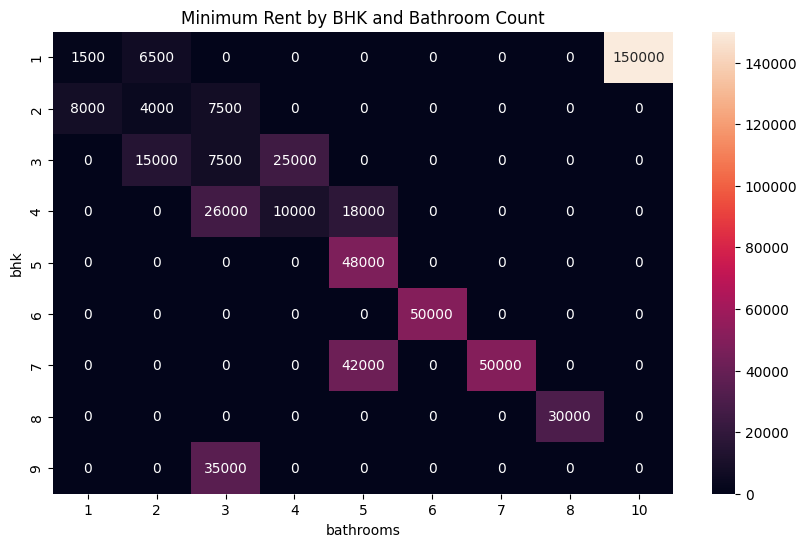

In [ ]:
pivot_mean = df.pivot_table(index='bhk', columns='bathrooms', values='rent', aggfunc='min',fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_mean, annot=True, fmt=".0f")
plt.title("Minimum Rent by BHK and Bathroom Count")
plt.show()

#### Maximum rent by bhk and bathrooms

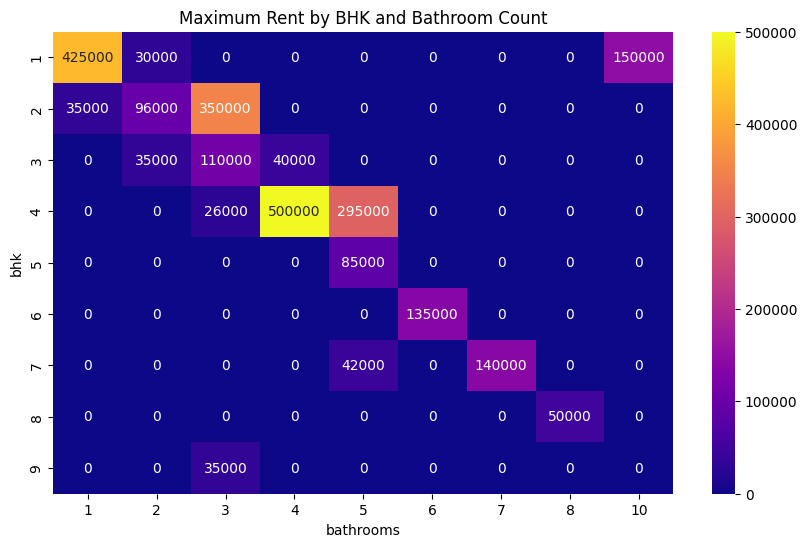

In [ ]:
pivot_mean = df.pivot_table(index='bhk', columns='bathrooms', values='rent', aggfunc='max',fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_mean, annot=True, fmt=".0f",cmap = 'plasma')
plt.title("Maximum Rent by BHK and Bathroom Count")
plt.show()

In [ ]:
numeric_analysis = pd.pivot_table(data=df,
                                  index=['bhk','bathrooms'],
                                  # columns = 'bathrooms',
                                  values=['rent'],
                                  aggfunc=['mean', 'median', 'min', 'max','count'],fill_value = 0)

print(numeric_analysis)

                        mean    median     min     max count
                        rent      rent    rent    rent  rent
bhk bathrooms                                               
1   1           10024.593443    7100.0    1500  425000   305
    2           14176.470588   10000.0    6500   30000    17
    10         150000.000000  150000.0  150000  150000     1
2   1           18625.000000   15750.0    8000   35000     4
    2           15366.566265   14000.0    4000   96000   332
    3           43541.666667   15500.0    7500  350000    12
3   2           24000.000000   25500.0   15000   35000     8
    3           28803.500000   25000.0    7500  110000    86
    4           37000.000000   40000.0   25000   40000     5
4   3           26000.000000   26000.0   26000   26000     1
    4           83909.090909   28000.0   10000  500000    11
    5           90400.000000   49000.0   18000  295000     5
5   5           66500.000000   66500.0   48000   85000     2
6   6           95000.00

#### Interpretation from Pivot Table (BHK, Bathrooms vs Rent)

- 1 BHK with 1 bathroom is the most common combination (305 listings) with median rent around ₹7,100. However, the maximum rent goes up to ₹4.25 lakhs, indicating some extreme outliers or serviced/luxury apartments in this category.

- 2 BHK with 2 bathrooms is also highly common (332 listings) with a median rent of ₹14,000 and a wide rent range from ₹4,000 to ₹96,000, suggesting a mix of budget and premium properties.

- 3 BHK with 3 bathrooms (86 listings) has a median rent of ₹25,000 and can go up to ₹1.1 lakhs, again showing variance in property quality and location.

- Some rare combinations like 1 BHK with 2 bathrooms (17 listings) and 2 BHK with 3 bathrooms (12 listings) exist but are less frequent.

- Listings with larger BHKs (4 to 9) and high bathroom counts show significantly higher mean and max rents, e.g.,:

- 4 BHK & 4 bath: Avg ₹83,909 (max ₹5 lakhs)

- 5 BHK & 5 bath: Avg ₹66,500

- 6 BHK & 6 bath: Avg ₹95,000

- 10 BHK & 10 bath: ₹1.5 lakhs (only 1 listing)

- Several configurations like (4 BHK, 3 bath), (9 BHK, 3 bath), and (7 BHK, 7 bath) have very low counts (1–3 listings) and are likely luxury.

- Higher BHKs and bathrooms generally correlate with higher rent, but some combinations like 2 BHK with 3 bathrooms or 3 BHK with 4 bathrooms also have extreme upper-end outliers.

- Some combinations have median rent much lower than mean rent, indicating presence of a few high-end outliers inflating the average.



#### categorical_features

In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features

['balcony',
 'furnishing_status',
 'parking',
 'primary_location',
 'city',
 'rent_available_from',
 'posted_month',
 'posted_day',
 'weekday/weekend']

In [ ]:
def cat_bivariate_analysis(col):
  result = df.groupby(col)['rent'].describe()
  return result

for col in categorical_features:
  results = cat_bivariate_analysis(col)
  print(f"Analysis for column: {col}\n")
  print(results)
  print('--'*50)


Analysis for column: balcony

               count          mean           std      min      25%      50%  \
balcony                                                                       
1              121.0  12271.074380   5572.214372   3500.0   8000.0  11000.0   
2               55.0  16847.290909   8778.635047   5500.0  10000.0  15000.0   
3               13.0  34192.307692  27728.999908  10000.0  17000.0  25000.0   
4                3.0  68333.333333  14433.756730  60000.0  60000.0  60000.0   
No Balcony      60.0  16650.000000  10467.973757   3000.0   8000.0  14000.0   
Not Mentioned  547.0  18660.696527  36842.737208   1500.0   7500.0  12000.0   

                   75%       max  
balcony                           
1              15000.0   36000.0  
2              20000.0   40000.0  
3              35000.0  110000.0  
4              72500.0   85000.0  
No Balcony     23250.0   45000.0  
Not Mentioned  18000.0  500000.0  
---------------------------------------------------------

#### Balconies vs Rent

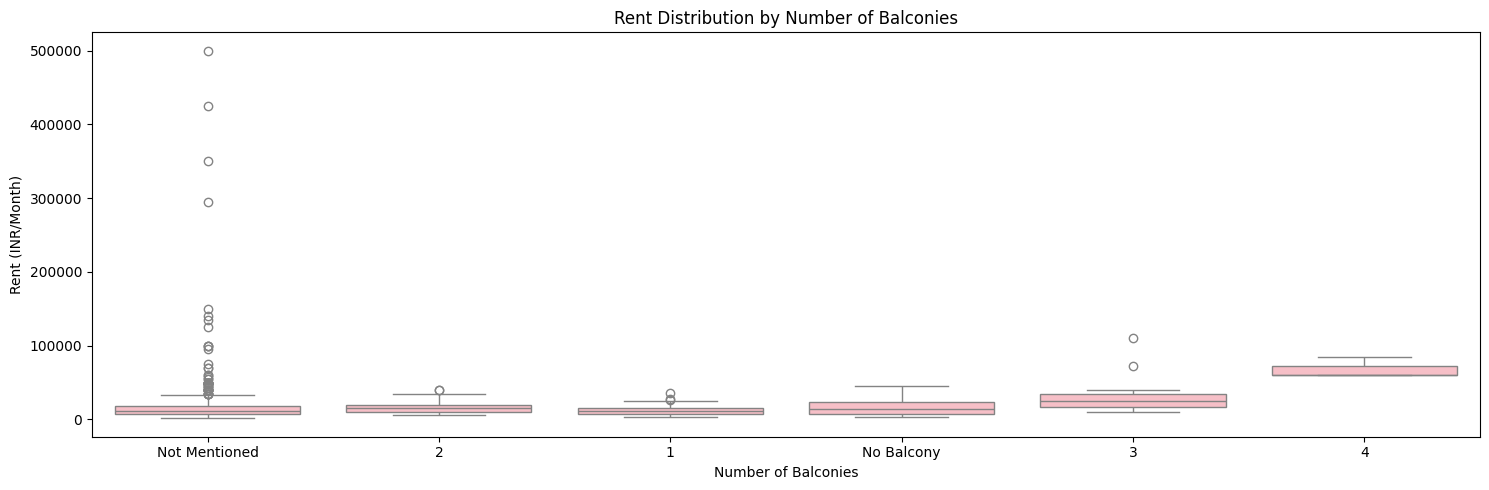

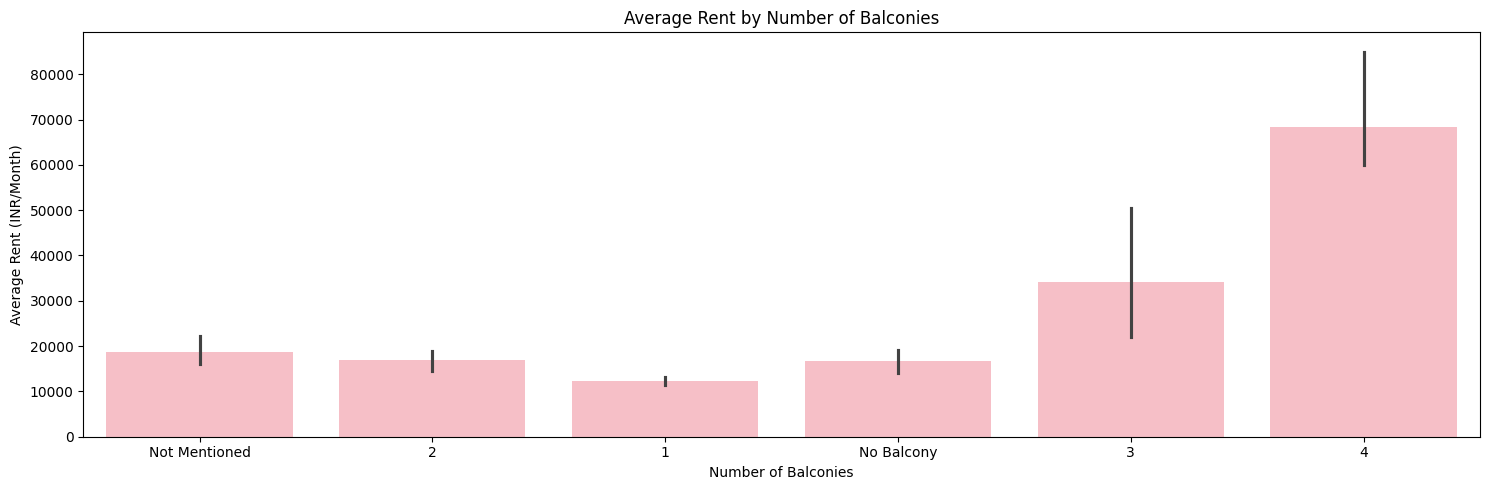

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='balcony', y='rent',color='lightpink')
plt.title('Rent Distribution by Number of Balconies')
plt.xlabel('Number of Balconies')
plt.ylabel('Rent (INR/Month)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
sns.barplot(data=df, x='balcony', y='rent',color='lightpink')
plt.title('Average Rent by Number of Balconies')
plt.xlabel('Number of Balconies')
plt.ylabel('Average Rent (INR/Month)')
plt.tight_layout()
plt.show()


- A positive correlation is observed between the number of balconies and the average rent.

- As the number of balconies increases, the average rent also increases:

- 1 balcony → ₹12.2K

- 2 balconies → ₹16.8K

- 3 balconies → ₹34.2K

- 4 balconies → ₹68.3K



#### Furnishing Status vs Rent

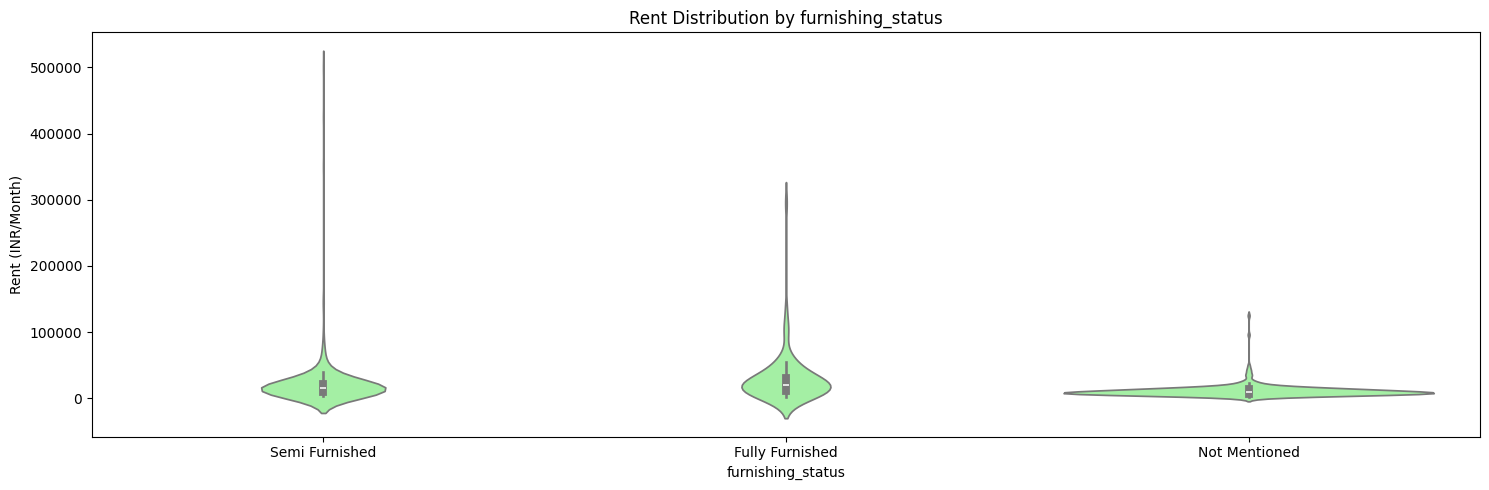

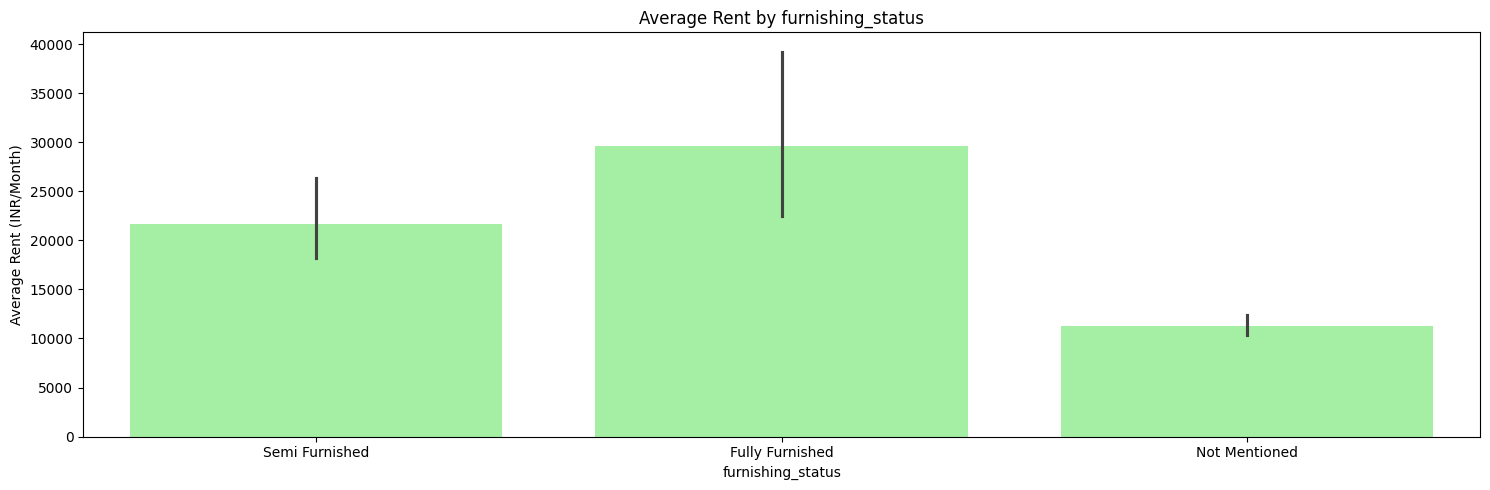

In [ ]:
plt.figure(figsize=(15, 5))
sns.violinplot(data=df, x='furnishing_status', y='rent',color='palegreen')
plt.title('Rent Distribution by furnishing_status')
plt.xlabel('furnishing_status')
plt.ylabel('Rent (INR/Month)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
sns.barplot(data=df, x='furnishing_status', y='rent',color='palegreen')
plt.title('Average Rent by furnishing_status')
plt.xlabel('furnishing_status')
plt.ylabel('Average Rent (INR/Month)')
plt.tight_layout()
plt.show()

- Fully Furnished properties have the highest average rent at ₹29,580, significantly higher than both:

- Semi Furnished (₹21,672)

- Not Mentioned (₹11,294)

- Median rent is also highest for Fully Furnished (₹20,000) compared to:

- Semi Furnished: ₹15,000

- Not Mentioned: ₹9,500

- The standard deviation is high for both Fully and Semi Furnished, indicating a wide variation in rent values — possibly due to location, amenities, or size.

#### Parking vs Rent

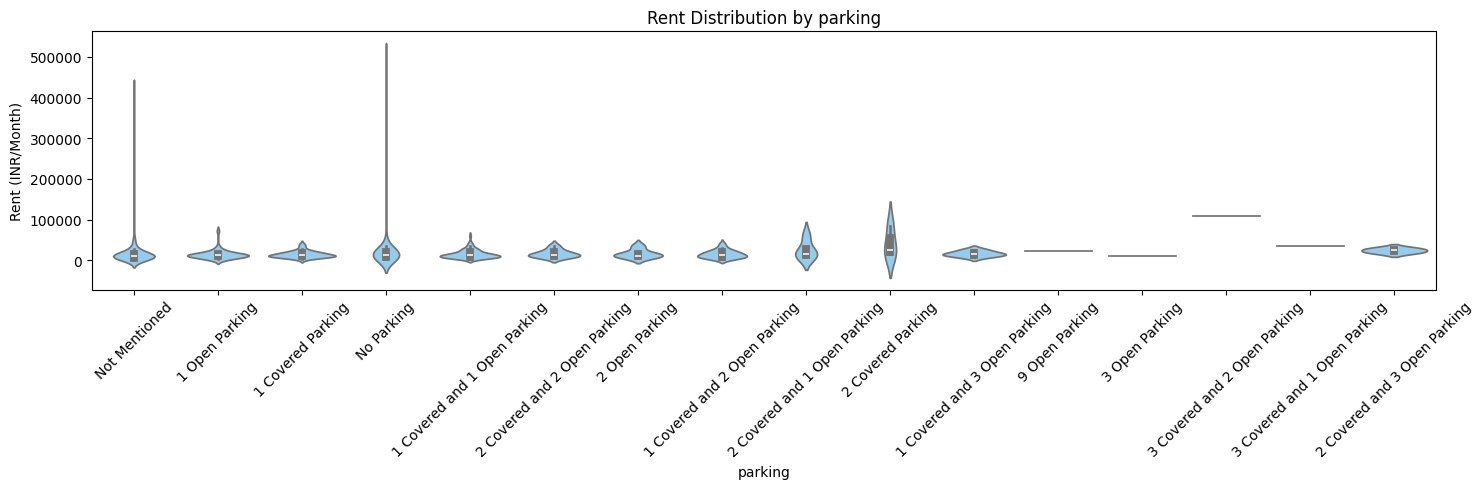

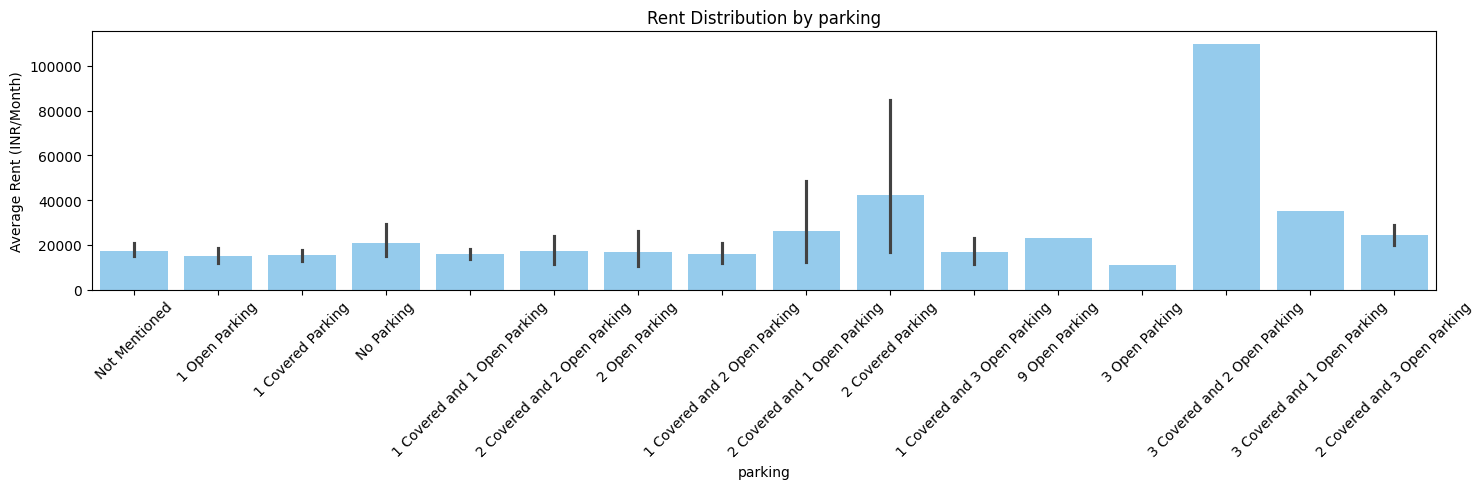

In [ ]:
plt.figure(figsize=(15, 5))
sns.violinplot(data=df, x='parking', y='rent',color='lightskyblue')
plt.title('Rent Distribution by parking')
plt.xlabel('parking')
plt.xticks(rotation=45)
plt.ylabel('Rent (INR/Month)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
sns.barplot(data=df, x='parking', y='rent',color='lightskyblue')
plt.title('Rent Distribution by parking')
plt.xlabel('parking')
plt.xticks(rotation=45)
plt.ylabel('Average Rent (INR/Month)')
plt.tight_layout()
plt.show()

- More covered parking spaces are generally associated with higher average rent:

- 2 Covered Parking: ₹42,333 (highest avg rent among categories with >1 sample)

- 3 Covered and 2 Open Parking: ₹1,10,000 (only 1 listing — outlier)

- 1 Covered and 3 Open Parking: ₹16,875 (reasonable sample)

### city vs rent

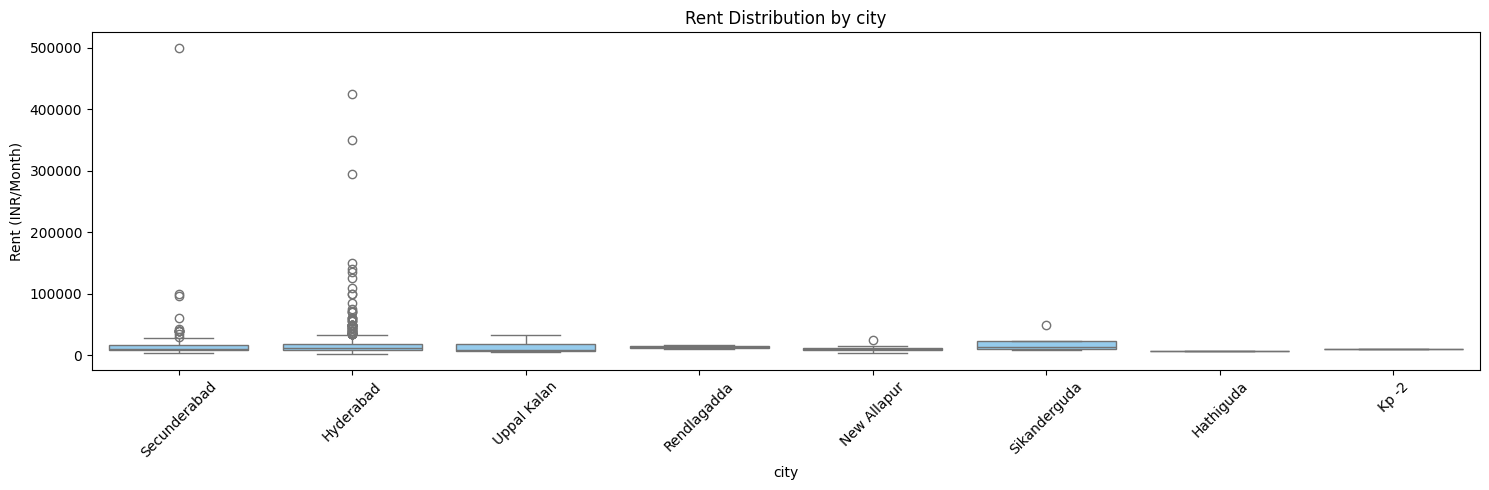

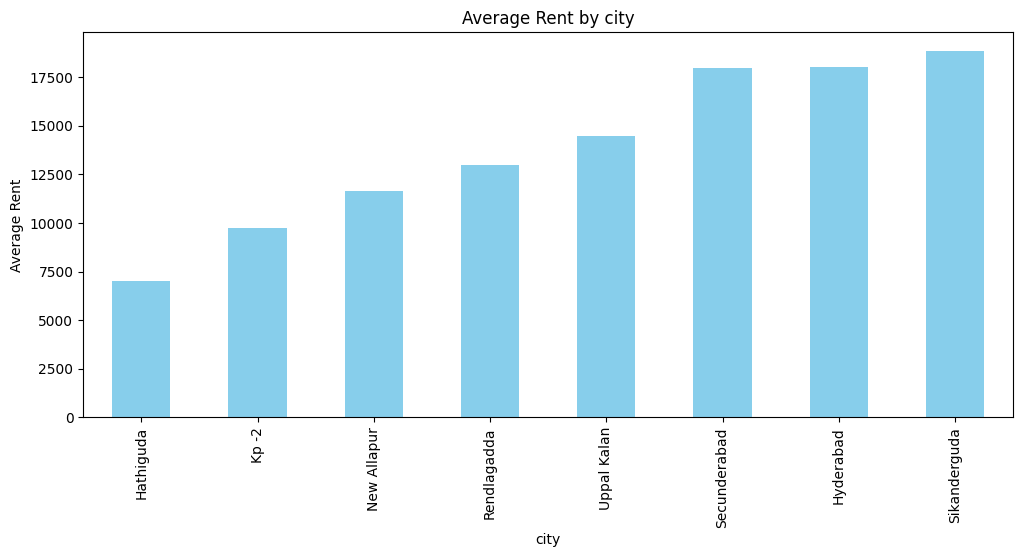

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='city', y='rent',color='lightskyblue')
plt.title('Rent Distribution by city')
plt.xlabel('city')
plt.xticks(rotation=45)
plt.ylabel('Rent (INR/Month)')
plt.tight_layout()
plt.show()


plt.figure(figsize=(12,5))
df.groupby('city')['rent'].mean().sort_values().plot(kind='bar',color='skyblue')
plt.title('Average Rent by city')
plt.xlabel('city')
plt.ylabel('Average Rent')
plt.show()

- Hyderabad,Sikinderguda and Secunderabad dominate the listings, with average rents around ₹18,000 per month, showing a wide range of rents and high variability due to outliers.

- Smaller localities like Hathiguda and Kp -2 have lower average rents (~₹7,000 to ₹9,750).

- Areas such as Sikanderguda show higher average rents (~₹18,875), suggesting more premium housing options in those neighborhoods.

#### Availability vs Rent

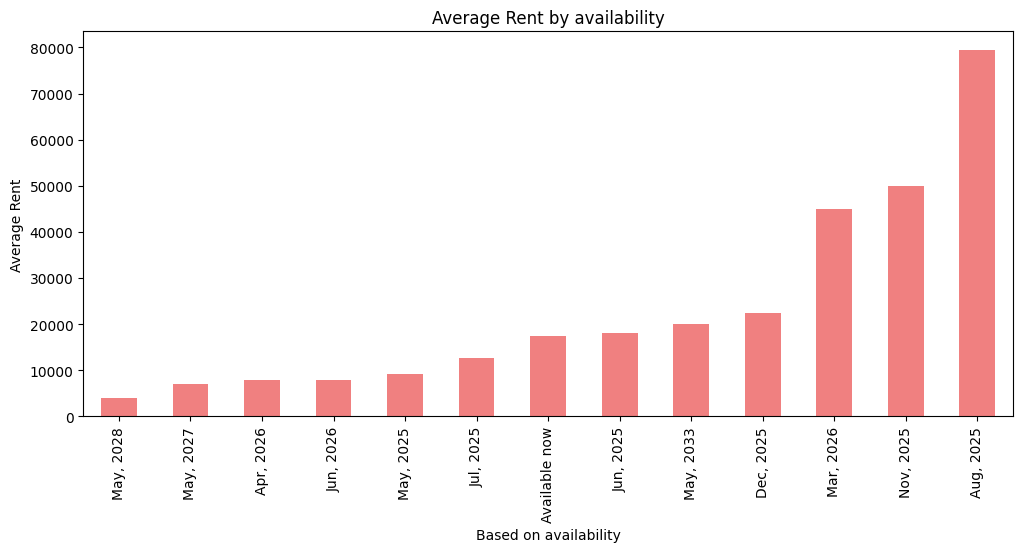

In [ ]:
plt.figure(figsize=(12,5))
df.groupby('rent_available_from')['rent'].mean().sort_values().plot(kind='bar',color='lightcoral')
plt.title('Average Rent by availability')
plt.xlabel('Based on availability')
plt.ylabel('Average Rent')
plt.show()

### Avg rent by posted month,day and weekday or weekend

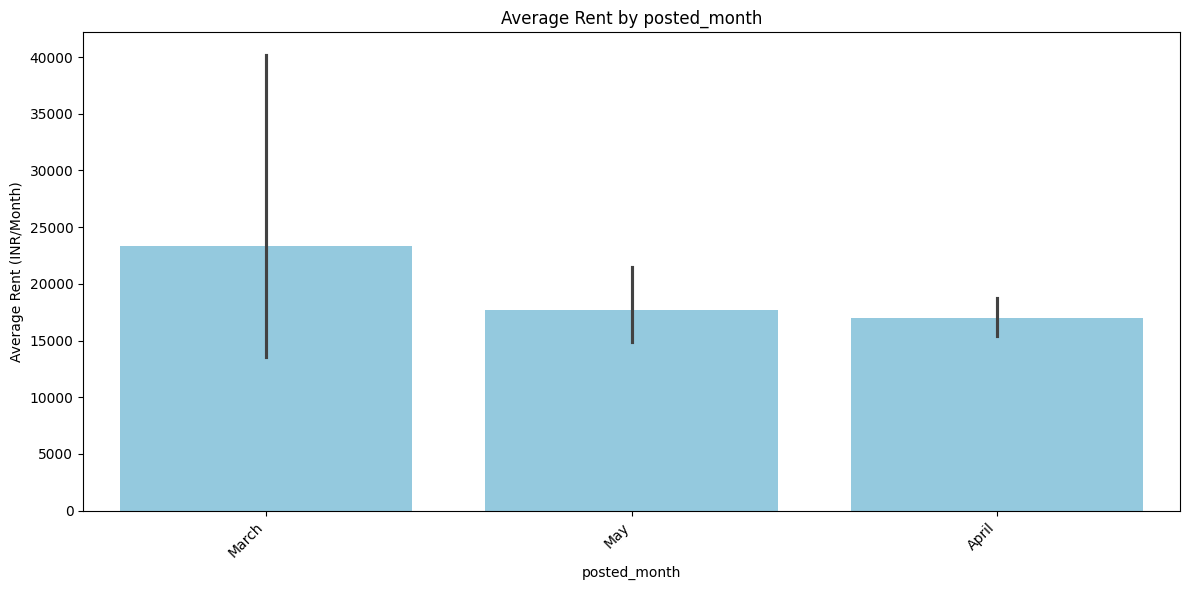

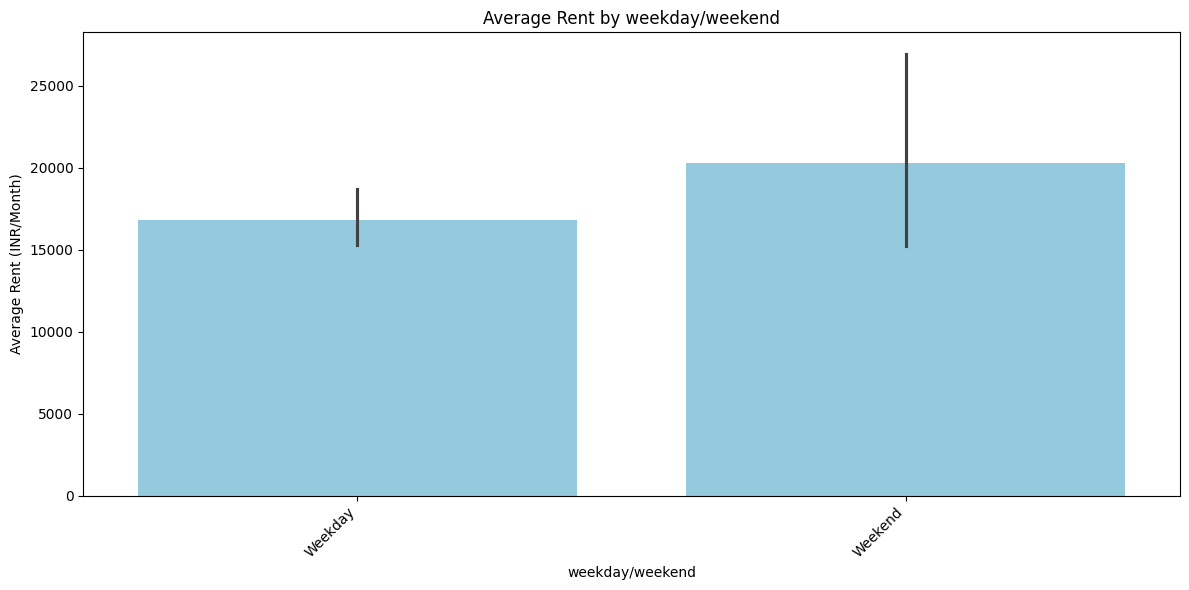

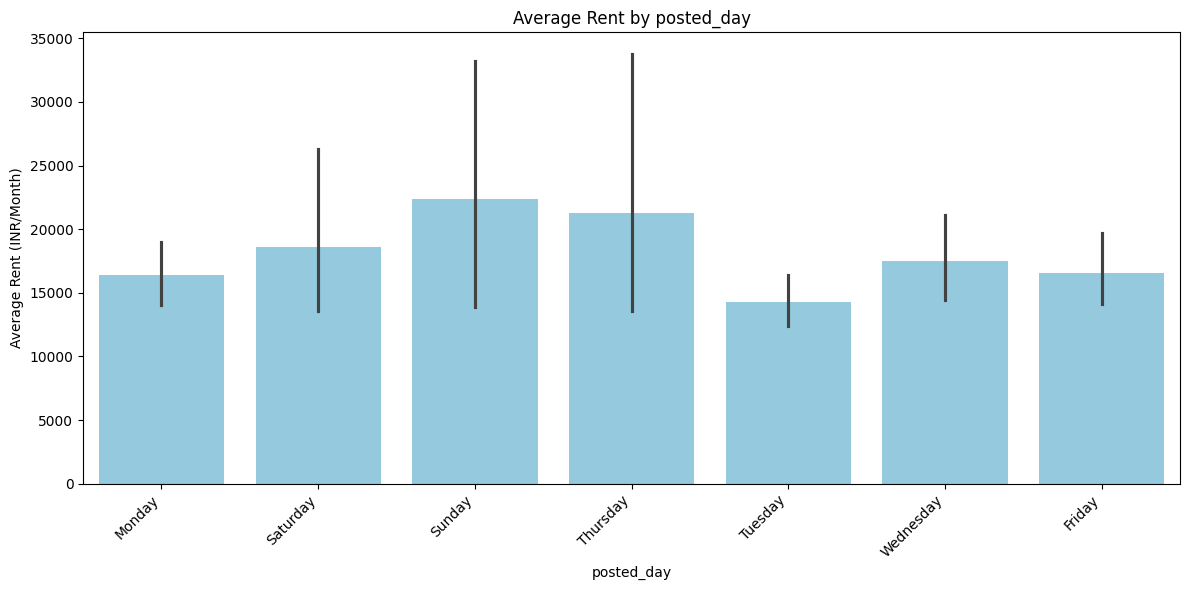

In [ ]:
categorical_cols = ['posted_month', 'weekday/weekend', 'posted_day']

for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x=col, y='rent', estimator=np.mean, color='skyblue')
    plt.title(f'Average Rent by {col}')
    plt.xlabel(col)
    plt.ylabel('Average Rent (INR/Month)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
for col in categorical_cols:
  results = df.groupby(df[col])['rent'].describe()
  print(results)

              count          mean           std     min     25%      50%  \
posted_month                                                               
April         346.0  17020.809249  16790.148092  1500.0  8000.0  12500.0   
March          66.0  23318.181818  61193.051162  3000.0  9000.0  13000.0   
May           387.0  17672.098191  33671.445672  2000.0  7500.0  11000.0   

                  75%       max  
posted_month                     
April         20000.0  150000.0  
March         18375.0  500000.0  
May           16750.0  425000.0  
                 count          mean           std     min     25%      50%  \
weekday/weekend                                                               
Weekday          556.0  16804.679856  21017.855413  1500.0  8000.0  12000.0   
Weekend          243.0  20262.962963  46944.690802  1500.0  8000.0  11000.0   

                     75%       max  
weekday/weekend                     
Weekday          18000.0  350000.0  
Weekend          1800

- Most listings were posted in May (387 listings), followed by April (346 listings), and the least in March (66 listings).

- On average, rents are highest for listings posted in March and lowest in April.

- More listings are posted on weekdays (556 listings) than on weekends (243 listings).

- Among days, Monday has the most listings posted (174), while Thursday has the least (70).

#### Primary Location vs Rent


In [ ]:
primary_location_vs_Rent = pd.DataFrame(df.groupby('primary_location')['rent'].describe().sort_values(by='count',ascending=False))
primary_location_vs_Rent.head(10)

,count,mean,std,min,25%,50%,75%,max
primary_location,,,,,,,,
Ameenpur,14.0,19035.714286,10485.272246,7000.0,14500.0,16750.0,22250.0,50000.0
Beeramguda,10.0,12200.000000,5138.093031,4000.0,8500.0,14000.0,15750.0,18000.0
Chengicherla,9.0,8377.777778,4218.642488,4000.0,5000.0,7500.0,10000.0,15000.0
Kompally,8.0,18062.500000,12213.685240,7000.0,11625.0,14000.0,19750.0,45000.0
Bandlaguda,8.0,12812.500000,5951.815449,6000.0,10625.0,12000.0,13250.0,26000.0
P S Rao Nagar,8.0,10725.000000,2385.521806,8000.0,9000.0,9900.0,12250.0,15000.0
Bayanna Nagar,7.0,20400.000000,22266.267461,7800.0,9500.0,11000.0,17500.0,70000.0
Prem Nagar,7.0,12500.000000,7942.501705,1500.0,8500.0,10000.0,17000.0,25000.0
Manikonda,7.0,21285.714286,6317.021601,15000.0,15000.0,22000.0,26000.0,30000.0


<Axes: xlabel='primary_location'>

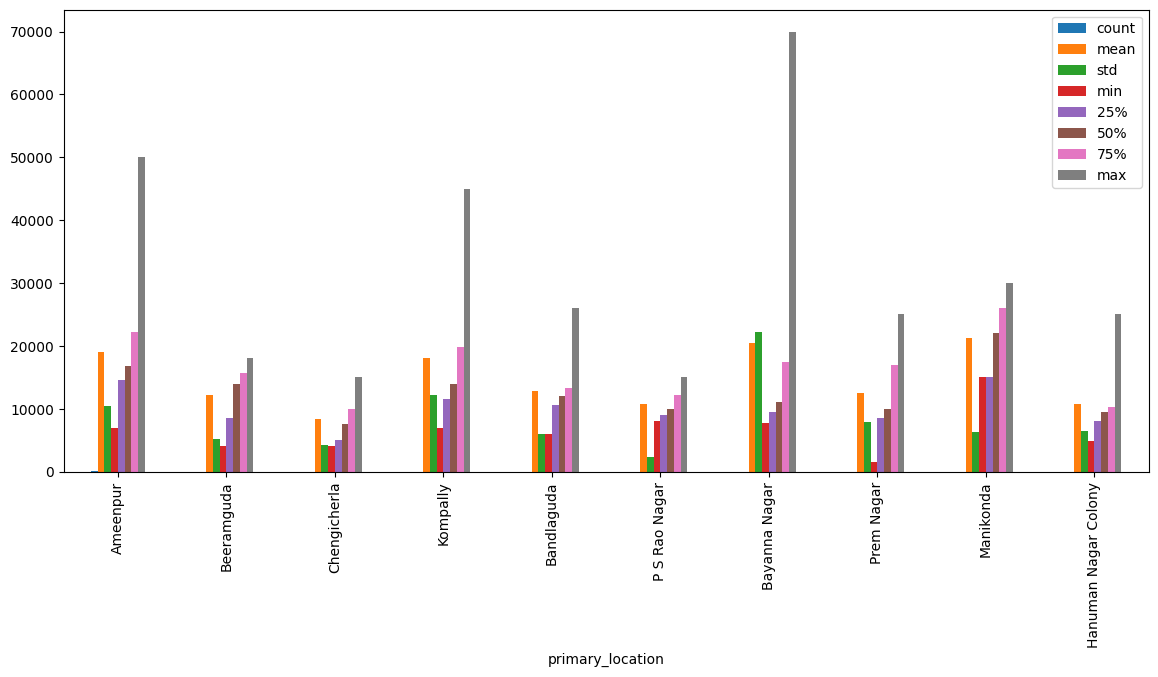

In [ ]:
primary_location_vs_Rent.head(10).plot(kind='bar',figsize=(14,6))

- Ameenpur has the highest number of listings (14) with an average rent of ₹19,036, ranging up to ₹50,000.

- Manikonda shows the highest average rent (₹21,286) among these locations, with a minimum rent of ₹15,000.

- Chengicherla has the lowest average rent (₹8,378), making it more affordable.

- Bayanna Nagar has the widest rent range (₹7,800 to ₹70,000), showing high variability.

In [ ]:
primary_location_vs_Rent = pd.DataFrame(df.groupby('primary_location')['rent'].describe().sort_values(by='count',ascending=False))
primary_location_vs_Rent.tail(10)

,count,mean,std,min,25%,50%,75%,max
primary_location,,,,,,,,
Jawahar Colony,1.0,11000.0,NaN,11000.0,11000.0,11000.0,11000.0,11000.0
Jalapalli,1.0,6000.0,NaN,6000.0,6000.0,6000.0,6000.0,6000.0
Jal Vayu Vihar,1.0,50000.0,NaN,50000.0,50000.0,50000.0,50000.0,50000.0
Jai home interiors,1.0,22500.0,NaN,22500.0,22500.0,22500.0,22500.0,22500.0
Jai Suryapatnam,1.0,5500.0,NaN,5500.0,5500.0,5500.0,5500.0,5500.0
Jadcherla,1.0,8000.0,NaN,8000.0,8000.0,8000.0,8000.0,8000.0
JPS ROYAL ENCLAVE,1.0,25000.0,NaN,25000.0,25000.0,25000.0,25000.0,25000.0
JP Colony,1.0,20000.0,NaN,20000.0,20000.0,20000.0,20000.0,20000.0
Isnapur,1.0,10000.0,NaN,10000.0,10000.0,10000.0,10000.0,10000.0


<Axes: xlabel='primary_location'>

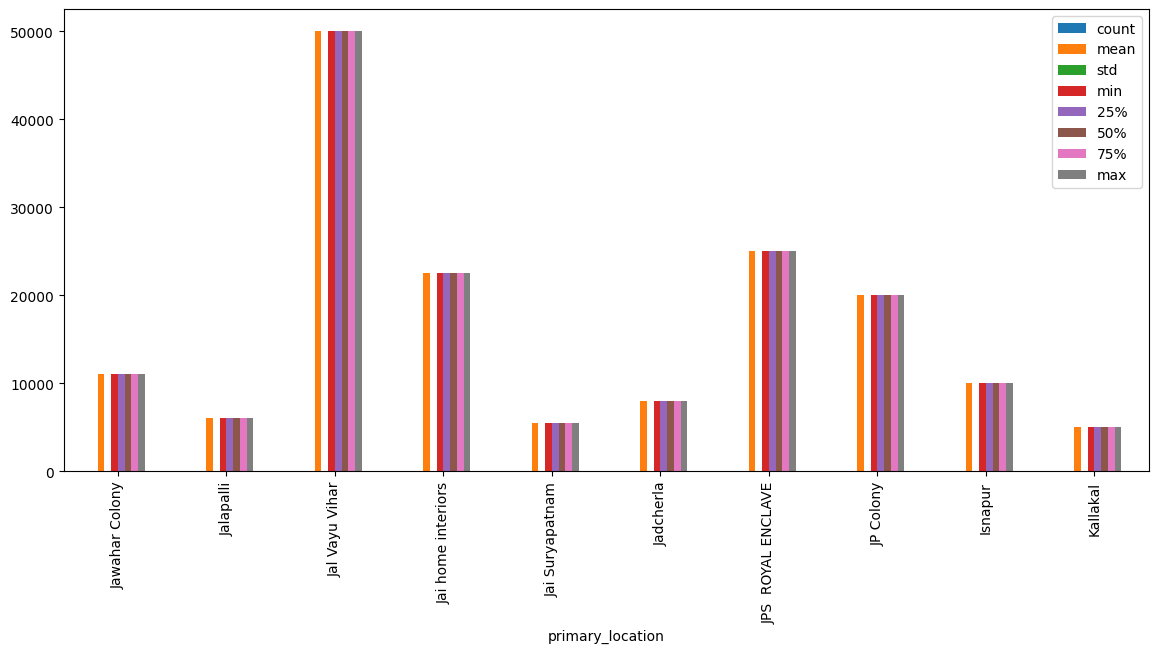

In [ ]:
primary_location_vs_Rent.tail(10).plot(kind='bar',figsize=(14,6))

- All listed locations have only one house, so their rent values are fixed and there's no variation (standard deviation is NaN).

- Jal Vayu Vihar has the highest single rent at ₹50,000, followed by JPS Royal Enclave at ₹25,000.

- Kallakal has the lowest rent at ₹5,000, making it the most affordable among them.

- These entries give limited insight due to the lack of multiple listings per location.

In [ ]:
df.groupby('primary_location')['rent'].min().sort_values()

,rent
primary_location,
Prem Nagar,1500
Siva Sai Puram,1500
New Gayatri Nagar,2000
Chandanagar,2000
Sundar Rao Nagar,2500
...,...
Commercial building and residence house,135000
Beerappagadda,140000
Our colony shaiket,150000


In [ ]:
df.groupby('primary_location')['rent'].max().sort_values(ascending=False)

,rent
primary_location,
Hanumanpet,500000
Madhura Nagar Colony,425000
Krishna Nagar,350000
independent house,295000
Our colony shaiket,150000
...,...
Sayeedabad Colony,3500
Badangpet bheeshmanagar,3500
TPS Colony,3500


### Multivariate Analysis

<Figure size 1000x500 with 0 Axes>

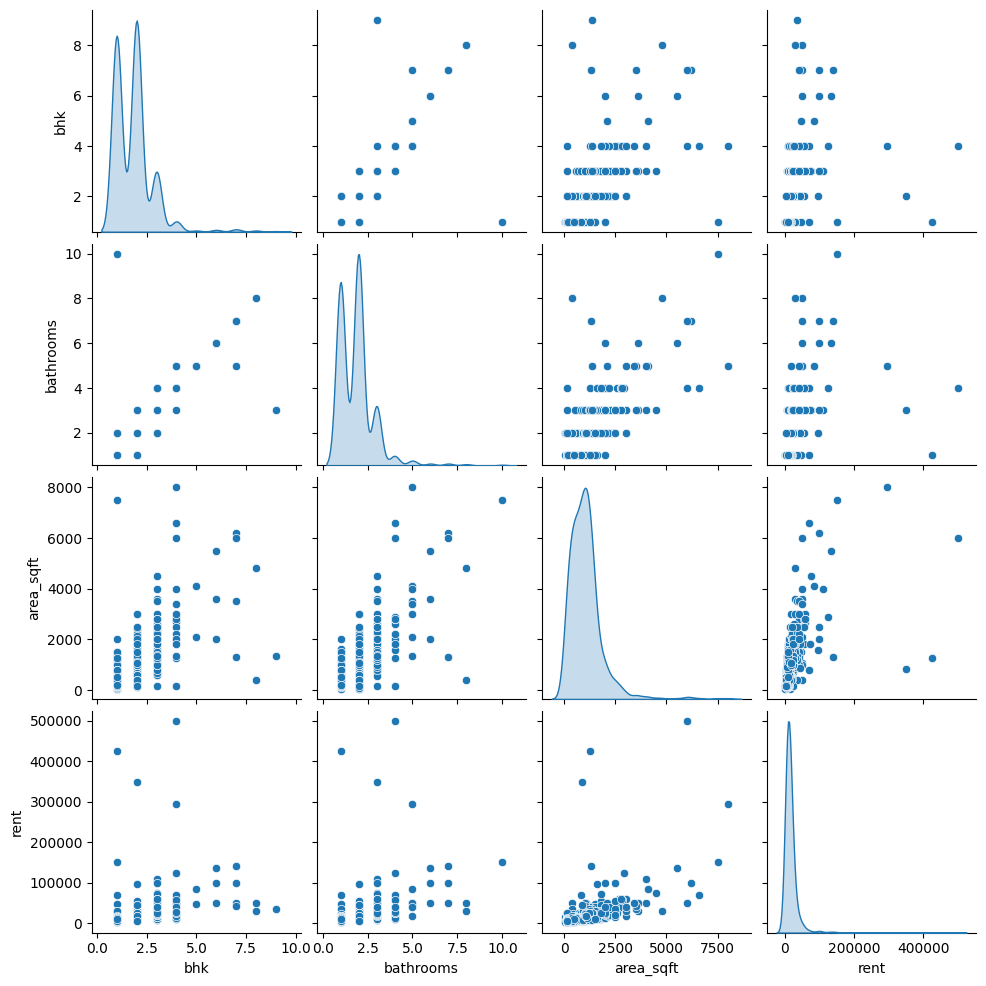

In [ ]:
plt.figure(figsize=(10,5))
sns.pairplot(data=df[numerical_features],diag_kind='kde')
plt.show()

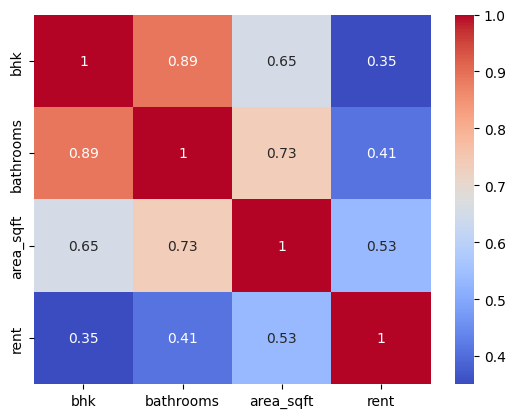

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

- BHK and bathrooms are highly correlated (0.89), suggesting more BHKs usually mean more bathrooms.

- Area (sqft) is moderately correlated with both BHK (0.65) and bathrooms (0.73).

- Rent has a moderate correlation with area (0.53) and lower correlation with BHK (0.35) and bathrooms (0.41).

- This implies rent increases more consistently with area than with BHK or bathrooms.


## 🔹 Slide: **Univariate Analysis**

**Title**: Univariate Analysis of Key Features

**Content**:

* **Definition**: Distribution of individual features (one variable at a time).
* **Features Analyzed**:

  * `bhk`: Most listings are 2 or 3 BHKs.
  * `bathrooms`: Majority have 2 bathrooms.
  * `rent`: Positively skewed; majority between ₹8,000 – ₹20,000.
  * `area_sqft`: Most properties between 800–1500 sq ft.
  * `primary_location`: Top locations with the most listings (e.g., Ameenpur, Beeramguda).
  * `posted_month/day`: April and May have higher postings; more on weekdays.

**Visuals**:

* Histograms / Count plots for `bhk`, `bathrooms`, `rent`, `area_sqft`.
* Bar plots for `primary_location` and `posted_month`.

---

## 🔹 Slide: **Bivariate Analysis**

**Title**: Bivariate Analysis (Feature vs. Target)

**Content**:

* **Definition**: Relationship between two variables.
* **Findings**:

  * `bhk` vs `rent`: Higher BHK generally leads to higher rent.
  * `bathrooms` vs `rent`: Similar positive trend.
  * `area_sqft` vs `rent`: Moderate positive correlation (\~0.53).
  * `primary_location` vs `rent`: Premium areas command higher rents.
  * `posted_day` vs `rent`: Some days like Sunday & Thursday show higher average rents.

**Visuals**:

* Boxplots or violin plots (`bhk` vs `rent`, `bathrooms` vs `rent`).
* Scatter plot (`area_sqft` vs `rent`).
* Grouped bar plots (`posted_day` or `posted_month` vs avg `rent`).

---

## 🔹 Slide: **Key Insights**

**Title**: Insights and Observations

**Content**:

* Properties with higher **area**, **BHK**, and **bathrooms** usually demand more rent.
* **Sunday**, **Thursday**, and **April–May** have higher average rents or more postings.
* No major **outliers** were removed; high-rent listings were verified to be valid based on size & features.
* Locations like **Manikonda** and **Bayanna Nagar** have significantly higher average rents.
* A strong correlation exists between `bhk` and `bathrooms` (\~0.88), suggesting well-structured properties.

---

## 🔹 (Optional) Slide: **Conclusion / Next Steps**

**Title**: Summary & Future Scope

**Content**:

* Explored rental trends by feature and time.
* Identified high-demand areas and key rental drivers.
* Future scope: build predictive model for rental price estimation using selected features.

---

If you'd like, I can help **create the slides in bullet format** or export as a PowerPoint file too. Just let me know.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   bhk                  807 non-null    int64         
 1   bathrooms            807 non-null    int64         
 2   balcony              807 non-null    object        
 3   area_sqft            807 non-null    int64         
 4   furnishing_status    807 non-null    object        
 5   parking              807 non-null    object        
 6   primary_location     807 non-null    object        
 7   city                 807 non-null    object        
 8   rent_available_from  807 non-null    object        
 9   posted_date          807 non-null    datetime64[ns]
 10  posted_month         807 non-null    object        
 11  posted_day           807 non-null    object        
 12  weekday/weekend      807 non-null    object        
 13  rent                 807 non-null  

In [ ]:
df['bhk'].value_counts()

,count
bhk,
2,350
1,327
3,101
4,17
7,4
6,3
8,2
5,2
9,1


<Axes: ylabel='bhk'>

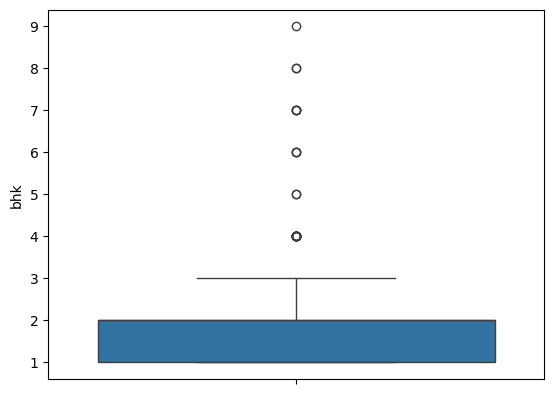

In [ ]:
sns.boxplot(df['bhk'])

<ipython-input-47-f506b0eb3226>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='bhk', ax=axes[0], palette='Set2')
<ipython-input-47-f506b0eb3226>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='bathrooms', ax=axes[1], palette='Set3')


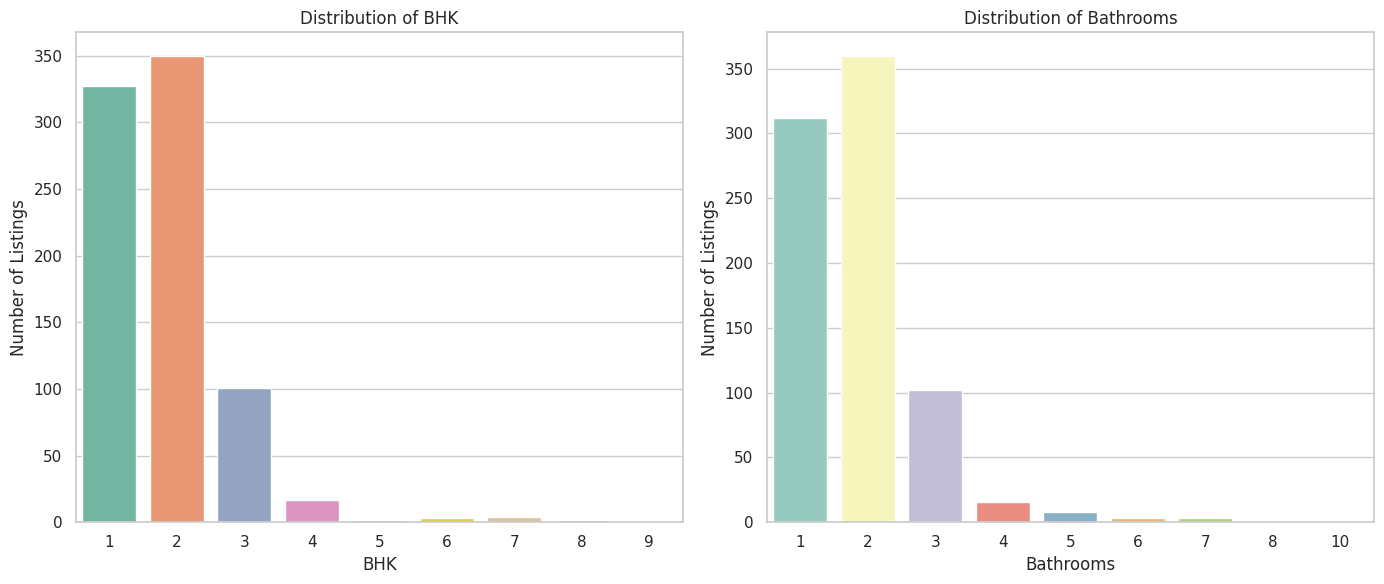

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Set plot style
sns.set(style="whitegrid")

# Create a 1x2 subplot for bhk and bathrooms
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Countplot for BHK
sns.countplot(data=df, x='bhk', ax=axes[0], palette='Set2')
axes[0].set_title('Distribution of BHK')
axes[0].set_xlabel('BHK')
axes[0].set_ylabel('Number of Listings')

# Countplot for Bathrooms
sns.countplot(data=df, x='bathrooms', ax=axes[1], palette='Set3')
axes[1].set_title('Distribution of Bathrooms')
axes[1].set_xlabel('Bathrooms')
axes[1].set_ylabel('Number of Listings')

# Display the plots
plt.tight_layout()
plt.show()


<ipython-input-49-dfedb5a8dd02>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='bhk', palette='Set2', order=sorted(df['bhk'].dropna().unique()))


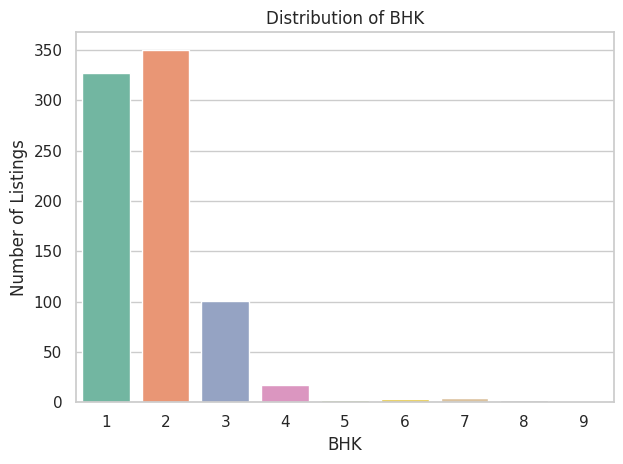

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Plot for BHK
# plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='bhk', palette='Set2', order=sorted(df['bhk'].dropna().unique()))
plt.title('Distribution of BHK')
plt.xlabel('BHK')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()


<ipython-input-50-167855f8830a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='bathrooms', palette='Set3', order=sorted(df['bathrooms'].dropna().unique()))


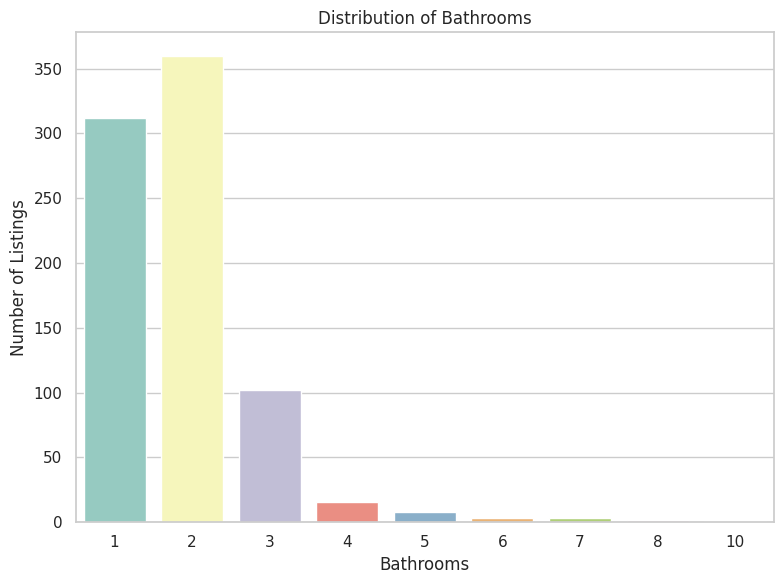

In [ ]:
# Plot for Bathrooms
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='bathrooms', palette='Set3', order=sorted(df['bathrooms'].dropna().unique()))
plt.title('Distribution of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()


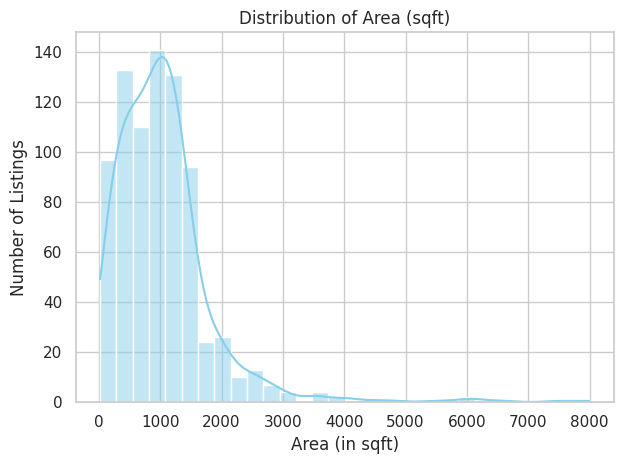

In [ ]:
# plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='area_sqft', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Area (sqft)')
plt.xlabel('Area (in sqft)')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()


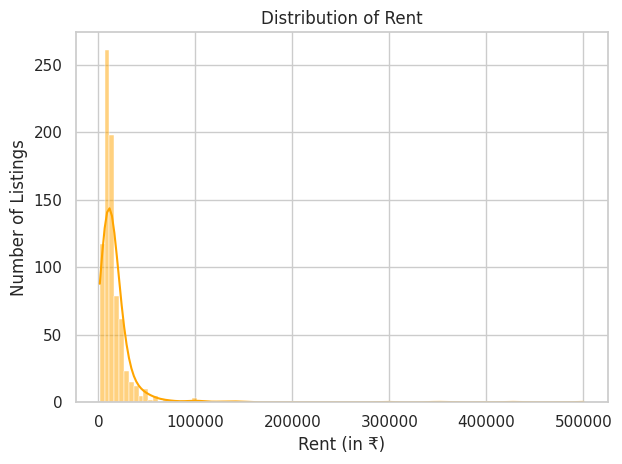

In [ ]:
# plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='rent', bins=100, kde=True, color='orange')
plt.title('Distribution of Rent')
plt.xlabel('Rent (in ₹)')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()


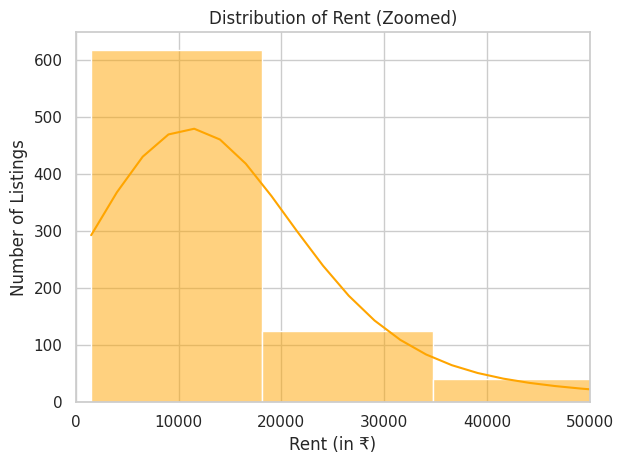

In [ ]:
# plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='rent', bins=30, kde=True, color='orange')
plt.xlim(0, 50000)  # Adjust based on where most data lies
plt.title('Distribution of Rent (Zoomed)')
plt.xlabel('Rent (in ₹)')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()


<ipython-input-58-87d5ff5c0438>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='furnishing_status', palette='Set2')


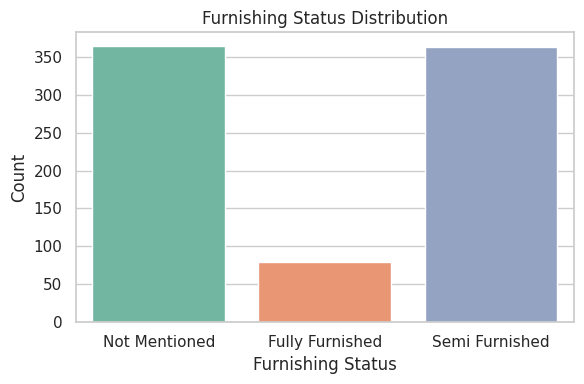

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='furnishing_status', palette='Set2')
plt.title('Furnishing Status Distribution')
plt.xlabel('Furnishing Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


<ipython-input-74-9a9c21a5dbe6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=parking_counts.index, y=parking_counts.values, palette='coolwarm')


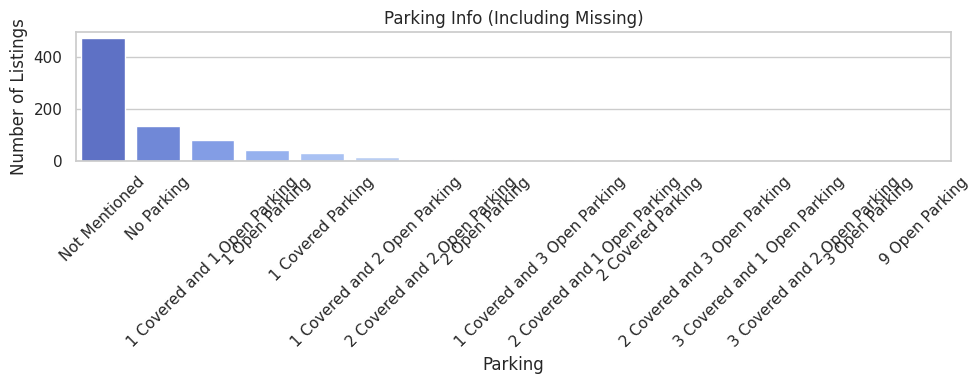

In [ ]:
plt.figure(figsize=(10, 4))
parking_counts = df['parking'].fillna('Missing').value_counts()
sns.barplot(x=parking_counts.index, y=parking_counts.values, palette='coolwarm')
plt.title('Parking Info (Including Missing)')
plt.xlabel('Parking')
plt.xticks(rotation=45)
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()


<ipython-input-65-2de8b4fe2965>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=balcony_counts.index, y=balcony_counts.values, palette='viridis')


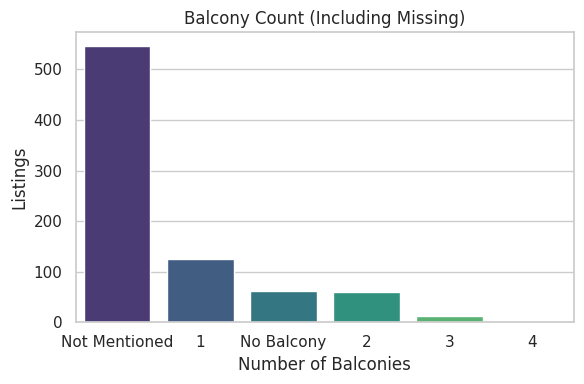

In [ ]:
# First check missing
plt.figure(figsize=(6, 4))
balcony_counts = df['balcony'].fillna('Missing').astype(str).value_counts()
sns.barplot(x=balcony_counts.index, y=balcony_counts.values, palette='viridis')
plt.title('Balcony Count (Including Missing)')
plt.xlabel('Number of Balconies')
plt.ylabel('Listings')
plt.tight_layout()
plt.show()


<ipython-input-67-fe0bce47c091>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='city', palette='Set1')


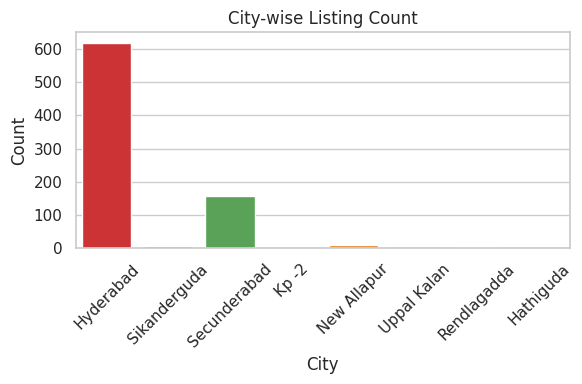

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='city', palette='Set1')
plt.title('City-wise Listing Count')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.tight_layout()
plt.show()


<ipython-input-71-c0b7f64bef8a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.index, y=top_locations.values, palette='mako')


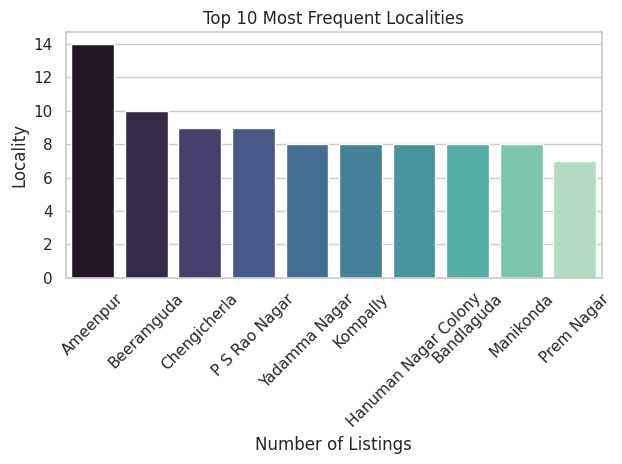

In [ ]:
# plt.figure(figsize=(8, 6))
top_locations = df['primary_location'].value_counts().nlargest(10)
sns.barplot(x=top_locations.index, y=top_locations.values, palette='mako')
plt.title('Top 10 Most Frequent Localities')
plt.xlabel('Number of Listings')
plt.xticks(rotation=45)
plt.ylabel('Locality')
plt.tight_layout()
plt.show()


<ipython-input-78-c6ee72cabd56>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='posted_day', palette='coolwarm')


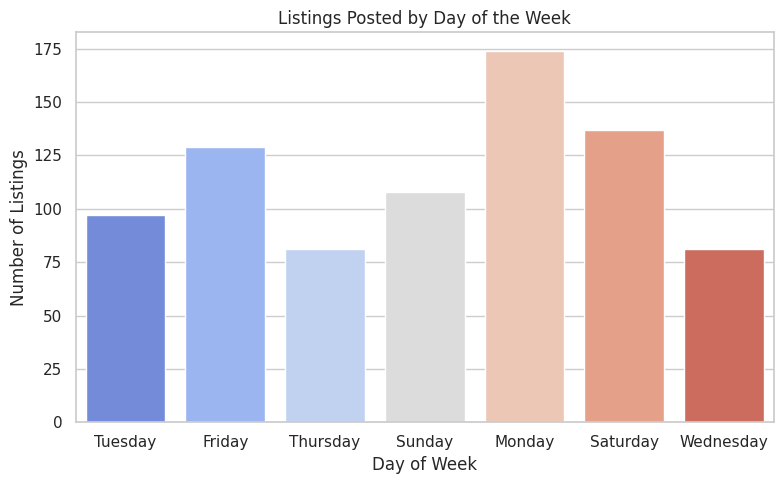

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='posted_day', palette='coolwarm')
plt.title('Listings Posted by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()


<ipython-input-80-dbcea059d9de>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='posted_month', palette='magma')


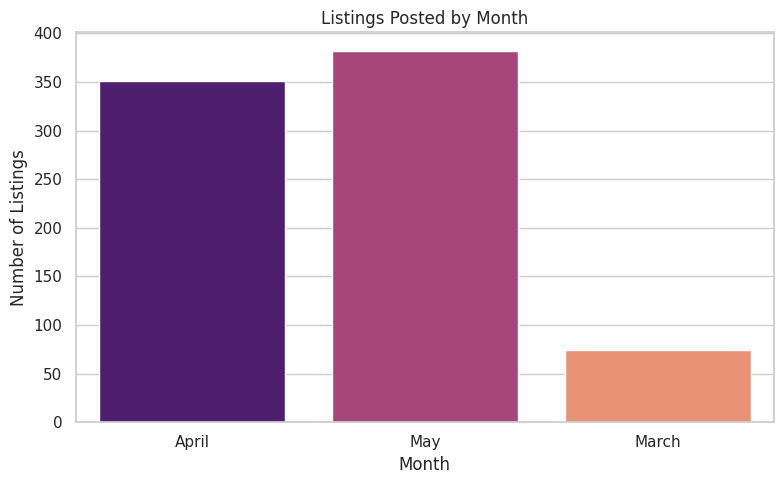

In [ ]:
plt.figure(figsize=(8, 5))
# month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.countplot(data=df, x='posted_month', palette='magma')
plt.title('Listings Posted by Month')
plt.xlabel('Month')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()


<ipython-input-81-12acc07fac4c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='weekday/weekend', palette=['#66c2a5', '#fc8d62'])


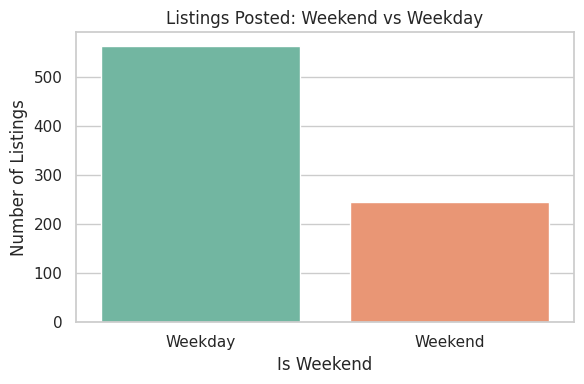

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='weekday/weekend', palette=['#66c2a5', '#fc8d62'])
plt.title('Listings Posted: Weekend vs Weekday')
plt.xlabel('Is Weekend')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   bhk                  807 non-null    int64         
 1   bathrooms            807 non-null    int64         
 2   balcony              807 non-null    object        
 3   area_sqft            807 non-null    int64         
 4   furnishing_status    807 non-null    object        
 5   parking              807 non-null    object        
 6   primary_location     807 non-null    object        
 7   city                 807 non-null    object        
 8   rent_available_from  807 non-null    object        
 9   posted_date          807 non-null    datetime64[ns]
 10  posted_month         807 non-null    object        
 11  posted_day           807 non-null    object        
 12  weekday/weekend      807 non-null    object        
 13  rent                 807 non-null  

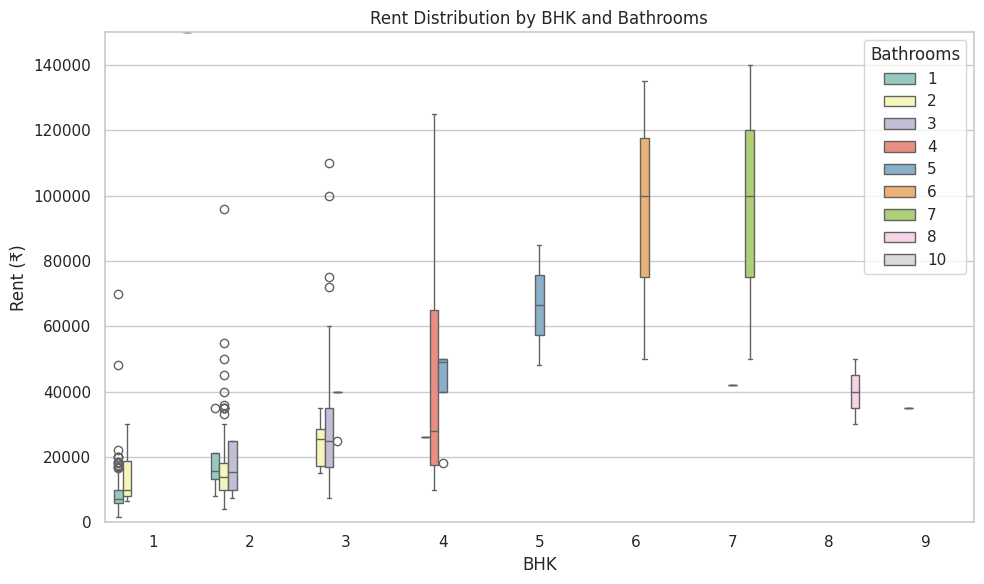

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='bhk', y='rent', hue='bathrooms', palette='Set3')
plt.title('Rent Distribution by BHK and Bathrooms')
plt.ylim(0, 150000)  # Adjust y limit to avoid extreme outlier stretch
plt.xlabel('BHK')
plt.ylabel('Rent (₹)')
plt.legend(title='Bathrooms')
plt.tight_layout()
plt.show()

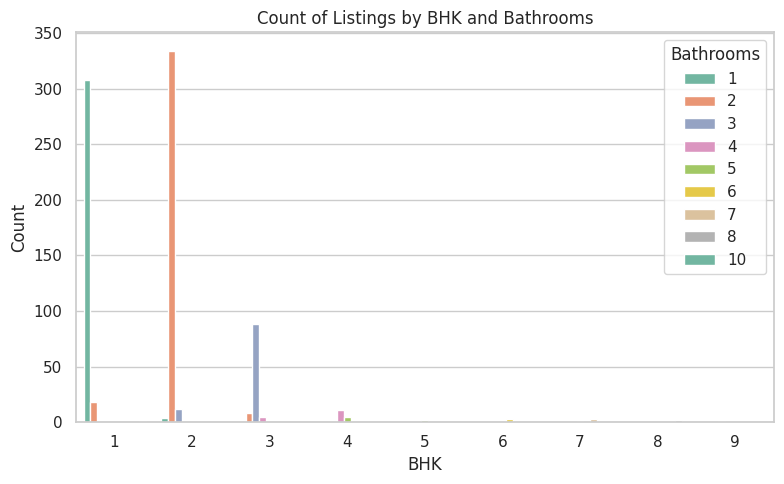

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='bhk', hue='bathrooms', palette='Set2')
plt.title('Count of Listings by BHK and Bathrooms')
plt.xlabel('BHK')
plt.ylabel('Count')
plt.legend(title='Bathrooms')
plt.tight_layout()
plt.show()

<ipython-input-84-1d5a26a10f2f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='bhk', y='rent', palette='Set3')


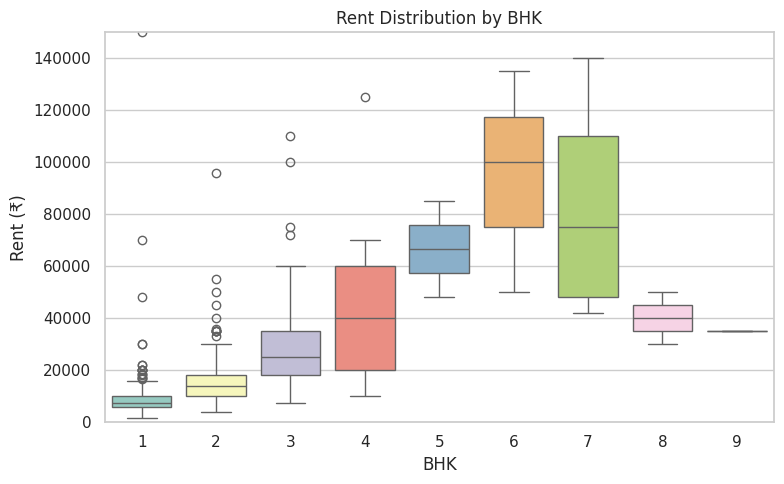

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='bhk', y='rent', palette='Set3')
plt.title('Rent Distribution by BHK')
plt.xlabel('BHK')
plt.ylabel('Rent (₹)')
plt.ylim(0, 150000)
plt.tight_layout()
plt.show()


<ipython-input-85-01511651fa5c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='bathrooms', y='rent', palette='Set2')


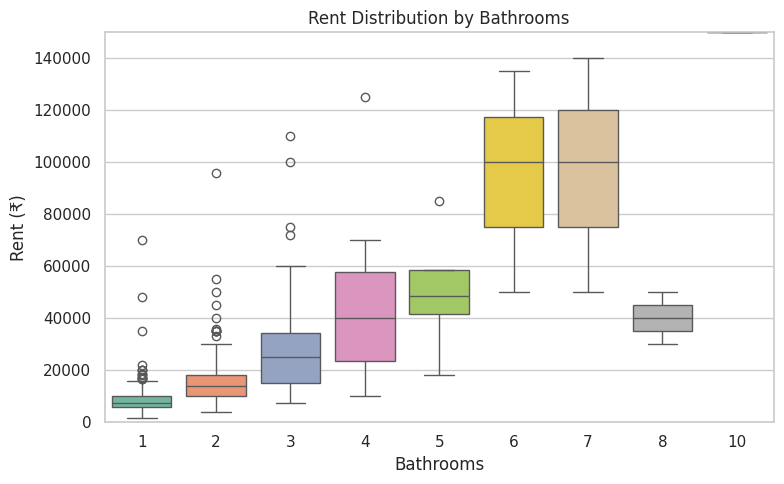

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='bathrooms', y='rent', palette='Set2')
plt.title('Rent Distribution by Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Rent (₹)')
plt.ylim(0, 150000)
plt.tight_layout()
plt.show()


<ipython-input-86-94171e169a26>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='furnishing_status', y='rent', palette='Pastel1')


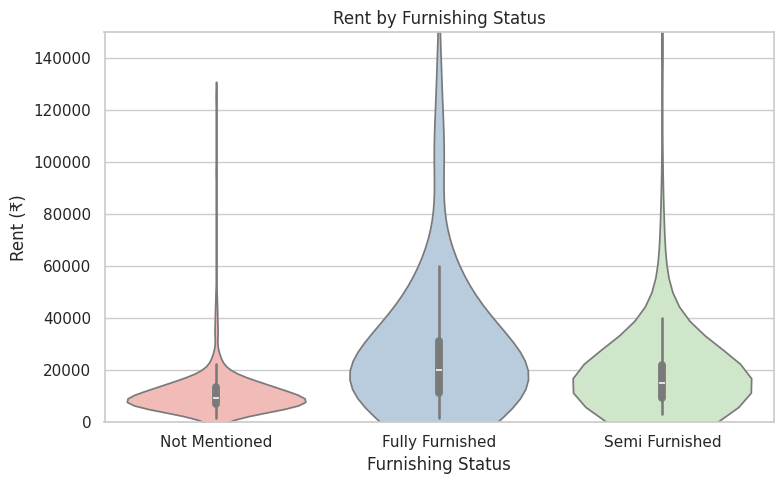

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x='furnishing_status', y='rent', palette='Pastel1')
plt.title('Rent by Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Rent (₹)')
plt.ylim(0, 150000)
plt.tight_layout()
plt.show()


<ipython-input-89-fb2993d1ac82>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=balcony_rent, x='balcony', y='rent', palette='Blues_d')


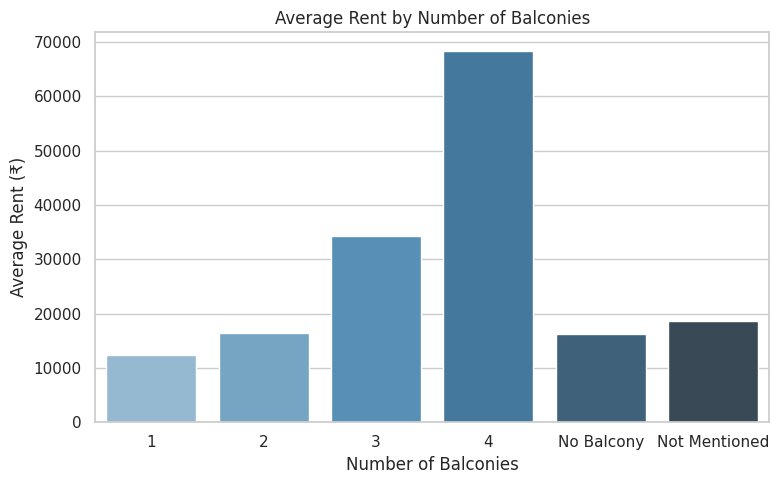

In [ ]:
balcony_rent = df.groupby('balcony')['rent'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=balcony_rent, x='balcony', y='rent', palette='Blues_d')
plt.title('Average Rent by Number of Balconies')
plt.xlabel('Number of Balconies')
plt.ylabel('Average Rent (₹)')
plt.tight_layout()
plt.show()


<ipython-input-90-c52fa3466c6e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rent_loc.values, y=avg_rent_loc.index, palette='rocket')


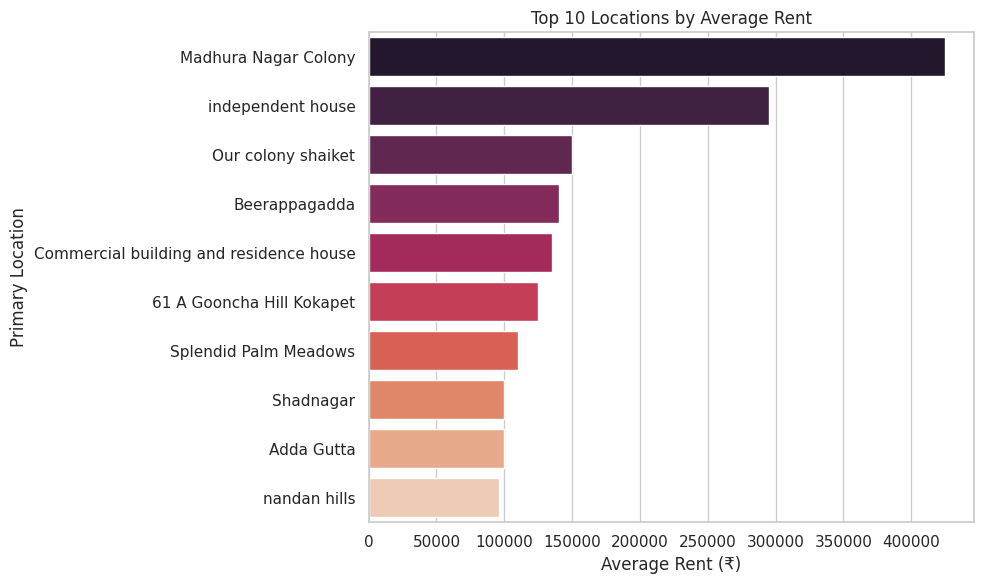

In [ ]:
avg_rent_loc = df.groupby('primary_location')['rent'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=avg_rent_loc.values, y=avg_rent_loc.index, palette='rocket')
plt.title('Top 10 Locations by Average Rent')
plt.xlabel('Average Rent (₹)')
plt.ylabel('Primary Location')
plt.tight_layout()
plt.show()


<ipython-input-92-27fa43767895>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rent', y='primary_location', data=top_highest, palette='Reds_r')


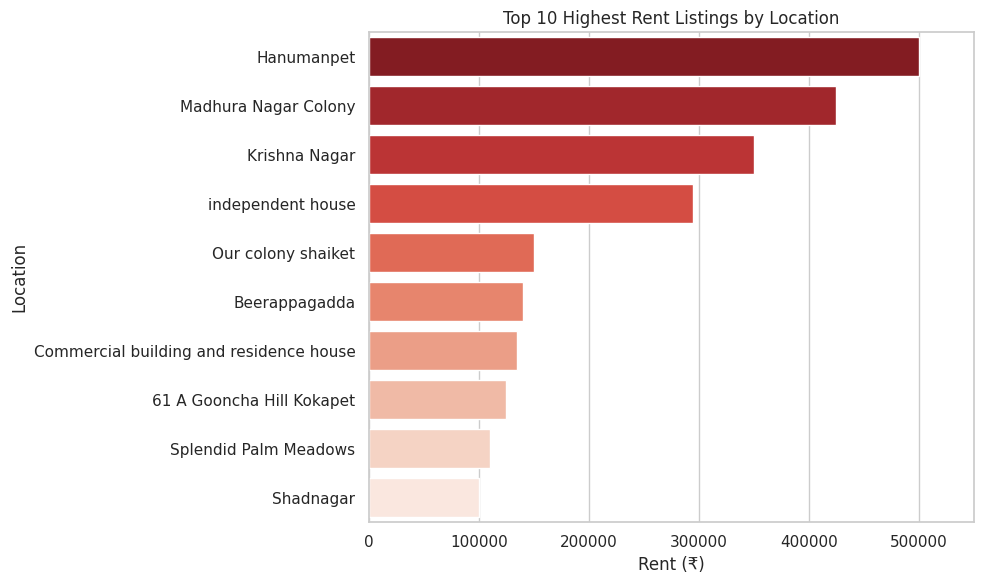

In [ ]:
top_highest = df.sort_values(by='rent', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='rent', y='primary_location', data=top_highest, palette='Reds_r')
plt.title('Top 10 Highest Rent Listings by Location')
plt.xlabel('Rent (₹)')
plt.ylabel('Location')
plt.xlim(0, top_highest['rent'].max()*1.1)
plt.tight_layout()
plt.show()


<ipython-input-93-b52f695c2747>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rent', y='primary_location', data=top_lowest, palette='Greens')


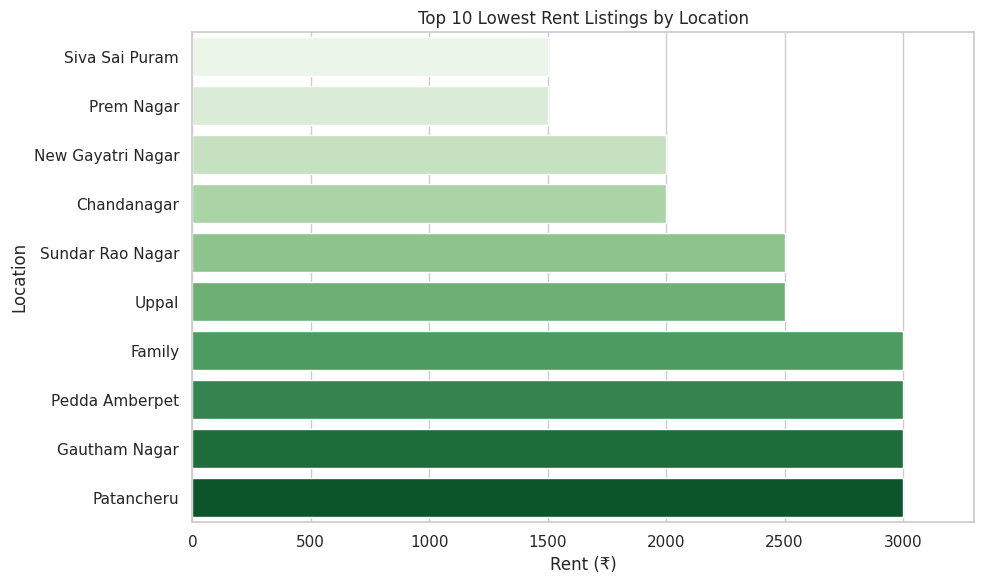

In [ ]:
top_lowest = df.sort_values(by='rent', ascending=True).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='rent', y='primary_location', data=top_lowest, palette='Greens')
plt.title('Top 10 Lowest Rent Listings by Location')
plt.xlabel('Rent (₹)')
plt.ylabel('Location')
plt.xlim(0, top_lowest['rent'].max()*1.1)
plt.tight_layout()
plt.show()


In [ ]:
# 🔚 Yes, Your Flow Was Correct:
# You've completed:

# Data Preprocessing & Cleaning

# Univariate Analysis – e.g., histograms, bar plots

# Bivariate Analysis – e.g., boxplots, groupby comparisons

# Multivariate Analysis – e.g., correlation heatmaps

# Pivot Tables – summarizing key combinations

In [ ]:
# Exactly! ✅ You’ve done the core of the **data analysis project**, and now you move to the **final and most important step**: communicating your **insights**.

# ### 🔚 Yes, Your Flow Was Correct:

# You've completed:

# 1. **Data Preprocessing & Cleaning**
# 2. **Univariate Analysis** – e.g., histograms, bar plots
# 3. **Bivariate Analysis** – e.g., boxplots, groupby comparisons
# 4. **Multivariate Analysis** – e.g., correlation heatmaps
# 5. **Pivot Tables** – summarizing key combinations

# ---

# ### ✅ Now, You Move to the Final Step:

# ## 🧠 **Insights & Findings Section**

# This is where you:

# * Summarize key patterns, trends, and relationships you discovered.
# * Relate those insights back to your problem/objective.
# * Mention any surprising/unexpected findings.
# * (Optional) Give **business suggestions or actions** if applicable.

# ---

# ### 💡 Example Insights (if your target is `rent`):

# * 📈 **Rent increases with number of BHKs**, but not linearly after 4 BHK.
# * 📍 **Certain localities have much higher average rents** regardless of size (e.g., Jubilee Hills).
# * 🛁 **Furnishing status (fully/semi/none)** has a noticeable impact on rent.
# * 📆 **Posted date has seasonality** – more listings around certain months.
# * 🚗 Properties with parking tend to have higher rents.
# * 📊 **Strong correlation found between area\_sqft and rent**.

# ---

# ### 🗂️ Deliverables You Can Prepare:

# * **Notebook** or `.py` file with code.
# * **Summary markdown/text section** with insights.
# * **Dashboard (optional)** using pivot tables/plots.
# * **PowerPoint** or **PDF report** with visualizations + key points.

# ---

# If you'd like, I can help **summarize your findings into proper insight statements or slides.** Just share the highlights or your pivot table summaries.


In [ ]:
# # Data Analysis Project: Key Headings and Techniques

# Here are the main headings and techniques commonly used in data analysis projects:

# ## Project Phases

# 1. **Problem Definition**
#    - Clarifying business questions
#    - Setting analysis objectives
#    - Defining success metrics

# 2. **Data Acquisition**
#    - Data collection methods
#    - Database queries
#    - API integration
#    - Web scraping (when appropriate)

# 3. **Data Cleaning & Preprocessing**
#    - Handling missing values
#    - Removing duplicates
#    - Outlier detection and treatment
#    - Data type conversion
#    - Feature scaling/normalization

# 4. **Exploratory Data Analysis (EDA)**
#    - Descriptive statistics
#    - Distribution analysis
#    - Correlation studies
#    - Pattern identification

# 5. **Feature Engineering**
#    - Creating new variables
#    - Dimensionality reduction
#    - Encoding categorical variables
#    - Transforming skewed data

# 6. **Model Development** (if applicable)
#    - Algorithm selection
#    - Training and validation
#    - Hyperparameter tuning
#    - Cross-validation

# 7. **Results Interpretation**
#    - Extracting insights
#    - Statistical significance testing
#    - Business implications

# 8. **Visualization & Communication**
#    - Creating meaningful charts
#    - Dashboard development
#    - Storytelling with data
#    - Executive summaries

# ## Key Techniques

# - **Statistical Analysis**: Hypothesis testing, regression analysis, ANOVA
# - **Machine Learning**: Classification, clustering, regression, anomaly detection
# - **Time Series Analysis**: Trend identification, seasonality decomposition, forecasting
# - **Text Analysis**: NLP, sentiment analysis, topic modeling
# - **Visualization**: Comparative charts, distributions, relationships, compositions
# - **A/B Testing**: Experiment design, control groups, statistical validation

# Would you like me to elaborate on any specific aspect of data analysis projects?

In [ ]:
# import requests
# from bs4 import BeautifulSoup
# import time

# headers = {
#     'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)'
# }

# base_url = 'https://housing.com/rent/independent-house-villa-from-owners-in-hyderabad-telangana-D2M2P679xe73u28050522?page='

# all_links = []

# # Loop from page 2 to 31
# for page_num in range(2, 32):
#     print(f"🔍 Fetching page {page_num}...")
#     url = base_url + str(page_num)

#     response = requests.get(url, headers=headers)

#     if response.status_code == 200:
#         soup = BeautifulSoup(response.text, 'html.parser')
#         a_tags = soup.find_all('a', attrs={'data-q': 'title'})

#         for tag in a_tags:
#             href = tag.get('href')
#             if href and href.startswith('/rent/'):
#                 full_url = 'https://housing.com' + href
#                 if full_url not in all_links:
#                     all_links.append(full_url)
#     else:
#         print(f"❌ Failed to fetch page {page_num} (status code: {response.status_code})")

#     time.sleep(1)  # polite delay to avoid overloading server

# # Output results
# print(f"\n✅ Extracted {len(all_links)} unique house listing links.\n")

# for link in all_links:
#     print(link)


In [ ]:
# import requests
# from bs4 import BeautifulSoup
# import numpy as np
# import pandas as pd
# import time

# # STEP 1: Load your list of 500 property URLs
# # urls = [
# #     'https://housing.com/rent/17315161-2000-sqft-4-bhk-independent-house-on-rent-in-golconda-fort-hyderabad',
# #     # Add the rest of your 500 URLs here
# # ]

# # STEP 2: Initialize lists for each field
# bhk_list = []
# rent_list = []
# posted_date_list = []
# area_list = []
# furnishing_list = []
# location_list = []
# bathrooms_list = []
# balcony_list = []
# available_from_list = []
# parking_list = []

# # STEP 3: Define a reusable extractor function
# def safe_extract(soup, tag, class_name):
#     el = soup.find(tag, class_=class_name)
#     return el.get_text(strip=True) if el else np.nan

# # STEP 4: Loop through all URLs
# for url in all_links:
#     try:
#         response = requests.get(url, timeout=10)
#         soup = BeautifulSoup(response.text, 'html.parser')

#         # BHK
#         bhk = safe_extract(soup, 'div', "css-1hidc9c")
#         bhk_list.append(bhk)

#         # Rent
#         rent = safe_extract(soup, 'div', "css-10rvbm3")
#         rent_list.append(rent)

#         # Posted Date
#         posted_date = np.nan
#         for div in soup.find_all('div'):
#             if div.text.strip().startswith("Last updated:"):
#                 posted_date = div.text.replace("Last updated:", "").strip()
#                 break
#         posted_date_list.append(posted_date)

#         # Area
#         area = safe_extract(soup, 'div', "T_textContainerStyle _cx1y44 _0h1h6o _9s1txw")
#         area_list.append(area)

#         # Furnishing
#         furnishing = safe_extract(soup, 'div', "css-1am49zs")
#         furnishing_list.append(furnishing)

#         # Location
#         location = safe_extract(soup, 'div', "css-1ty5xzi")
#         location_list.append(location)

#         # Table fields
#         bathrooms = balcony = available_from = parking = np.nan
#         for row in soup.find_all('tr'):
#             label = row.find('th')
#             value = row.find('td')
#             if label and value:
#                 label_text = label.get_text(strip=True)
#                 value_div = value.find('div') or value.find('a')
#                 val = value_div.get_text(strip=True) if value_div else value.get_text(strip=True)

#                 if label_text == "Bathrooms":
#                     bathrooms = val
#                 elif label_text == "Balcony":
#                     balcony = val
#                 elif label_text == "Available from":
#                     available_from = val
#                 elif label_text == "Parking":
#                     parking = val

#         bathrooms_list.append(bathrooms)
#         balcony_list.append(balcony)
#         available_from_list.append(available_from)
#         parking_list.append(parking)

#         print(f"✅ Scraped: {url}")
#         time.sleep(1)  # Be polite and avoid getting blocked

#     except Exception as e:
#         print(f"❌ Failed: {url} | Reason: {e}")
#         # Append NaN so lists stay aligned
#         bhk_list.append(np.nan)
#         rent_list.append(np.nan)
#         posted_date_list.append(np.nan)
#         area_list.append(np.nan)
#         furnishing_list.append(np.nan)
#         location_list.append(np.nan)
#         bathrooms_list.append(np.nan)
#         balcony_list.append(np.nan)
#         available_from_list.append(np.nan)
#         parking_list.append(np.nan)

# # STEP 5: Save to CSV
# df = pd.DataFrame({
#     "BHK": bhk_list,
#     "Rent": rent_list,
#     "Posted Date": posted_date_list,
#     "Area": area_list,
#     "Furnishing": furnishing_list,
#     "Location": location_list,
#     "Bathrooms": bathrooms_list,
#     "Balcony": balcony_list,
#     "Available From": available_from_list,
#     "Parking": parking_list
# })

# df.to_csv("housing_listings.csv", index=False)
# print("✅ All data saved to housing_listings.csv")


<ipython-input-94-c370b50e6daa>:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  area_bhk_pivot = df.pivot_table(index='bhk', columns='area_bin', values='rent', aggfunc='mean')


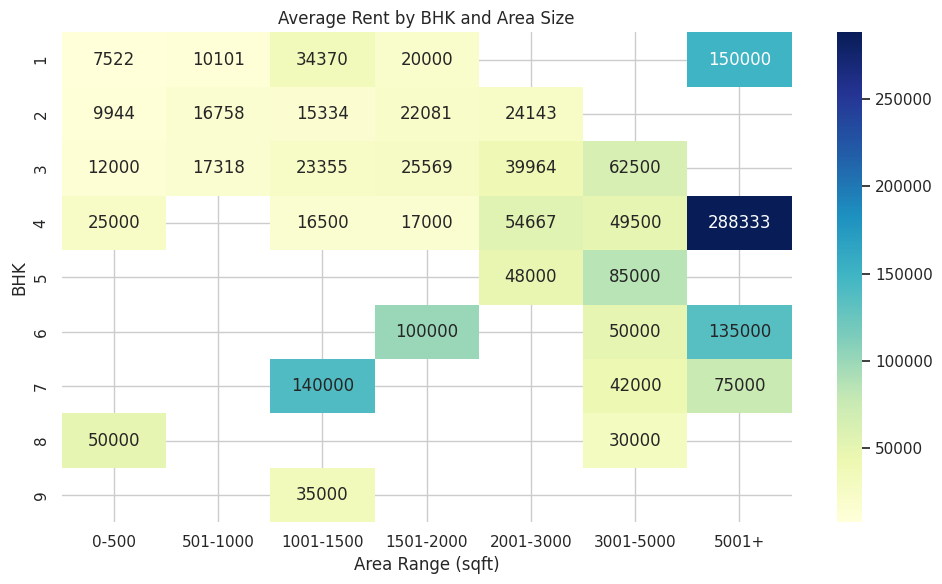

In [ ]:
# Bin area into categories
df['area_bin'] = pd.cut(df['area_sqft'], bins=[0, 500, 1000, 1500, 2000, 3000, 5000, 10000],
                        labels=['0-500','501-1000','1001-1500','1501-2000','2001-3000','3001-5000','5001+'])

# Pivot table
area_bhk_pivot = df.pivot_table(index='bhk', columns='area_bin', values='rent', aggfunc='mean')

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(area_bhk_pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Average Rent by BHK and Area Size')
plt.xlabel('Area Range (sqft)')
plt.ylabel('BHK')
plt.tight_layout()
plt.show()


In [ ]:
numerical_features

['bhk', 'bathrooms', 'area_sqft', 'rent']

In [ ]:
corr_matrix = df[numerical_features].corr()

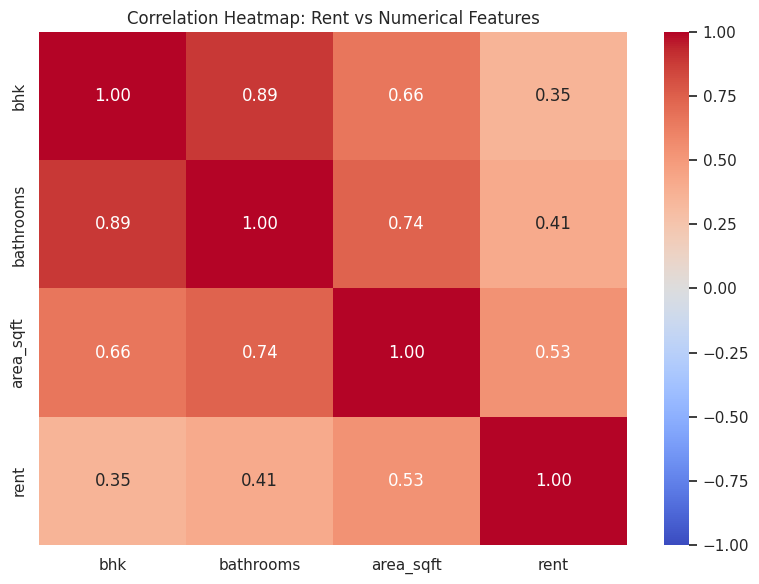

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap: Rent vs Numerical Features")
plt.tight_layout()
plt.show()

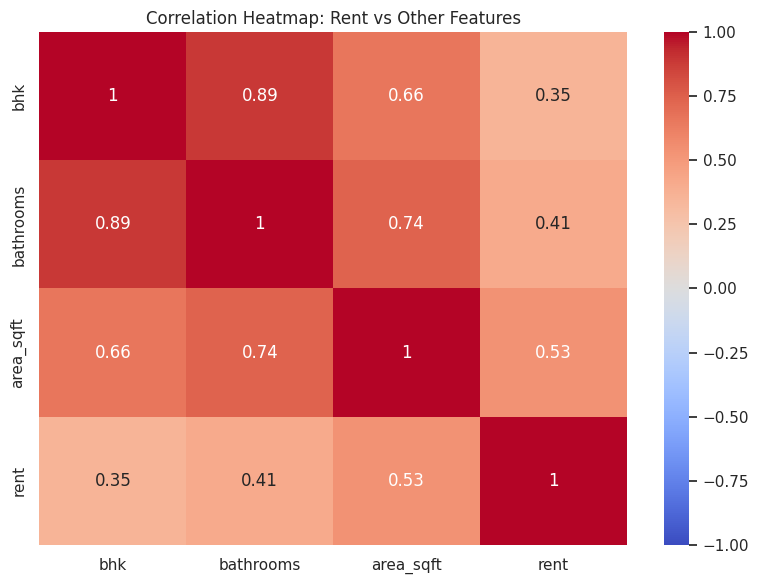

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Rent vs Other Features')
plt.tight_layout()
plt.show()